#Oscilador Armonico Simple

La posición, de un oscilador armonico simple quedo definida por:

$$x(t)=A\cos(\omega_{0}t-\delta)$$

La velocidad es: 

$$v(t)=-A\omega_{0}\sin(\omega_{0}-\delta)$$

La aceleración:

$$a(t)=-A\omega^2_{0}\cos(\omega_{0}-\delta)$$

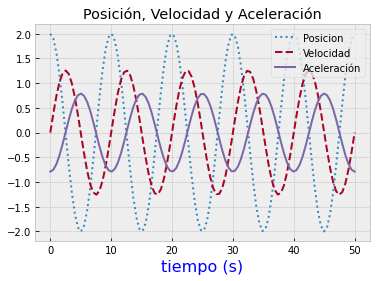

In [ ]:
import numpy as np                  #Libreria para traer las funciones matemáticas. p.e. seno, coseno y el número pi.
import matplotlib.pyplot as plt     #Libreria para la construcción de gráficos.
plt.style.use ("bmh") # estilo
figsize=(11,8) #8x3 pulgadas
dpi=600 # Resolucion de figura


#Definición de Frecuencia natural y constante de fase.
w=0.2*np.pi
delta=0

#Definición de Amplitud.
A=2

def x(t):
  return A*np.cos(w*t-delta)

def v(t):
  return A*w*np.sin(w*t-delta)

def a(t):
  return -A*w*w*np.cos(w*t-delta)

t=np.linspace(0,50,100)

plt.title("Posición, Velocidad y Aceleración")
plt.plot(t,x(t), ":", label="Posicion")         #Tipos de representación de gráficos, marcas y tipos de linea de gráficos --, go, bs, etc mas info en https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(t,v(t), "--", label="Velocidad")
plt.plot(t,a(t), label="Aceleración")
plt.xlabel('tiempo (s)', size = 16, color="blue")
plt.legend(loc=1)


#Soluciones del Péndulo Simple

Comparación entre el método análitico y método númerico de euler para la solución del péndulo simple. 

## Método de Euler

La ecuación de movimiento del pendulo simple es:

$$\dfrac{d^2\theta}{dt^2}+\dfrac{g}{l}\sin(\theta)=0$$

Para su solución mediante el método númerico:

1. Desacoplar la ecuación diferencial de segundo orden en dos ecuaciones de primer orden. Para ello introduciendo la velocidad angular $\omega = \dfrac{d\theta}{dt}$:

$$d\omega=-\dfrac{g}{l}\sin(\theta) dt$$
$$d\theta=\omega dt$$

2. Para manejar los valores infinitesimales es necesario aproximarlos como finitos (números muy pequeños, entre mas pequeños mejor funciona el método).

$$d\theta \approx \Delta\theta  \hspace{1cm} d\omega\approx\Delta\omega \hspace{1cm} dt \approx \Delta t$$

3. Para poner en marcha el algoritmo de Euler, comenzamos en t = 0:

$$\theta(0)=\theta_{0}$$
$$\omega(0)=0$$

4. Para evaluar las variaciones en futuros cercanos ($t+\Delta t$) se evaluan las ecuaciones del paso 2 y se realizan extrapolaciones lineales.

$$\Delta\omega(0)\approx-\dfrac{g}{l}\sin\theta(0) \Delta t \hspace{1cm}\rightarrow \hspace{1cm} \omega(0+\Delta t) \approx \omega(0)+\Delta \omega (0)  $$
$$\Delta \theta(0) \approx \omega(0)\Delta t \hspace{1cm} \rightarrow \hspace{1cm} \theta(0+\Delta t) \approx \theta(0) + \omega(0)\Delta t$$




In [ ]:
import numpy as np                  #Libreria para traer las funciones matemáticas. p.e. seno, coseno y el número pi.
import matplotlib.pyplot as plt     #Libreria para la construcción de gráficos.

plt.style.use ("bmh") # estilo
figsize=(8,3) #8x3 pulgadas
dpi=600 # Resolucion de figura


In [ ]:
g=9.81 #m/s^2
L=25 #m
m=40 #kg

def approx (t,theta0):
  return theta0*np.cos(t*(g/L)**.5)

def RHS (theta,w,dt):
  dw=-np.sin(theta)*dt*g/L
  dtheta=w*dt
  return dtheta,dw

def euler_step(theta,w,dt):
  dtheta,dw=RHS(theta,w,dt)
  w=w+dw
  theta = theta + dtheta
  return theta,w

def euler_method(theta0,w0,dt,n) :
  theta=(n+1)*[0]
  w=(n+1)*[0]
  theta[0]=theta0
  w[0]=w0
  for i in range (n):
    theta[i+1],w[i+1]=euler_step(theta[i],w[i],dt)
  return theta,w


In [ ]:
theta01=np.pi/24
theta02=np.pi/8
T=20
n=10000
t=np.linspace(0,T,n+1)
dt=T/float(n)
theta1,w1=euler_method(theta01,0,dt,n)
theta2,w2=euler_method (theta02,0,dt,n)


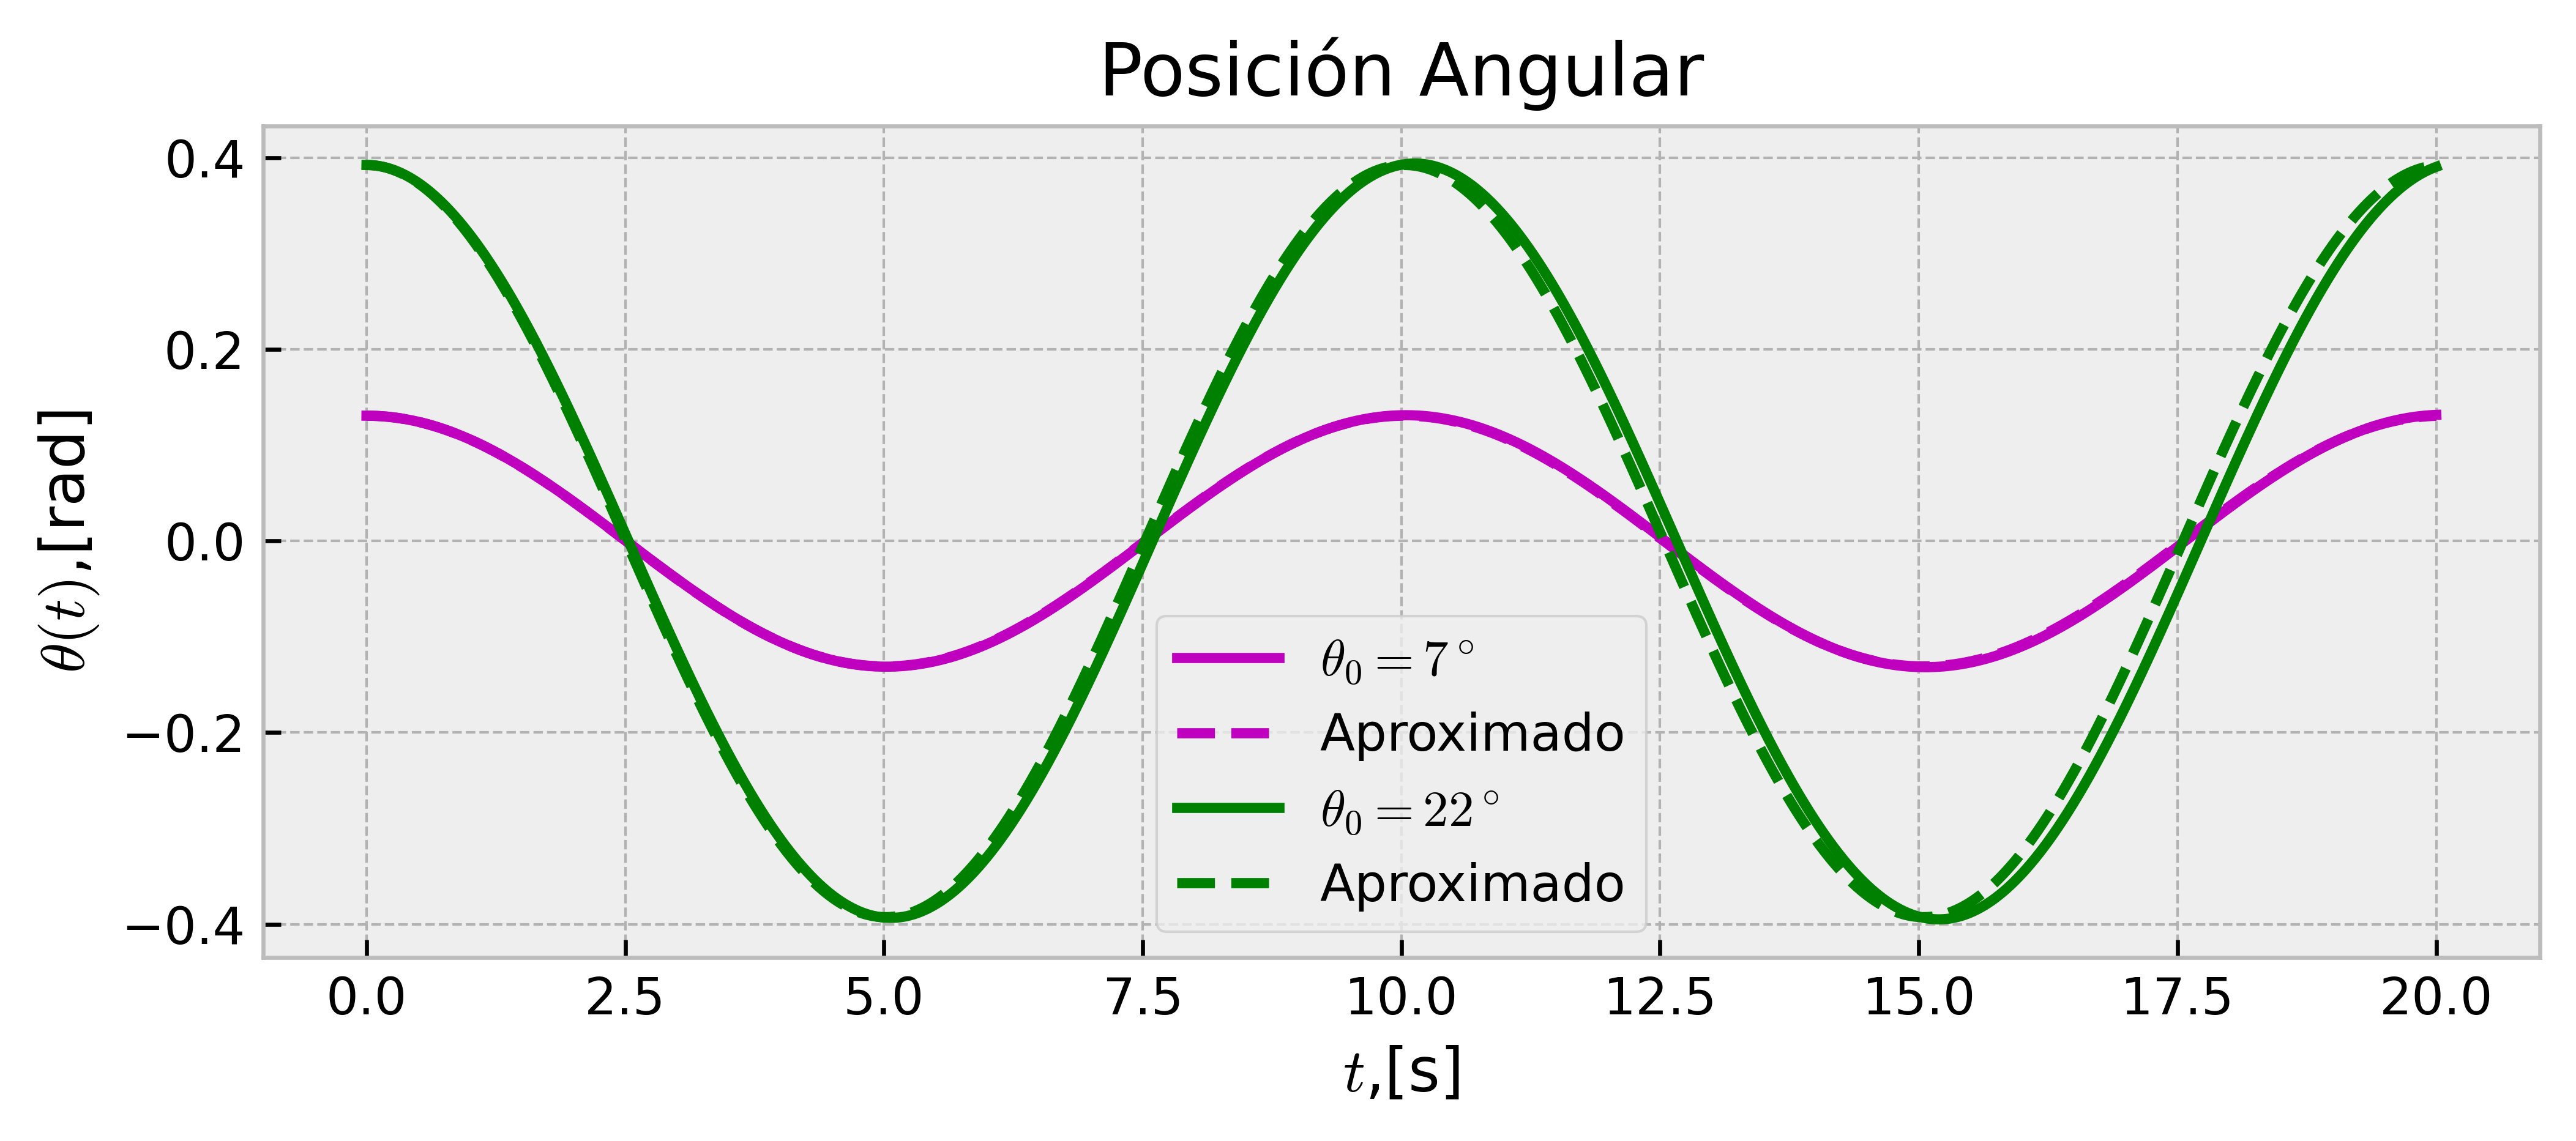

In [ ]:
plt.figure(figsize=figsize,dpi=dpi)
plt.title("Posición Angular")
plt.plot(t,theta1,"m",label=r"$\theta_0=%.0f^\circ$"%(theta01*180/np.pi))
plt.plot(t,approx(t,theta01),"m--",label=r"Aproximado")
plt.plot(t,theta2,"g",label=r"$\theta_0=%.0f^\circ$"%(theta02*180/np.pi))
plt.plot(t,approx(t,theta02),"g--",label=r"Aproximado")
plt.xlabel(r"$t$,[s]")
plt.ylabel(r"$\theta(t)$,[rad]")
plt.legend()
plt.show()

#Oscilaciones Colineales

Las características del movimiento de un cuerpo que se encuentra sometido simultáneamente a dos oscilaciones armónicas, permite describir la trayectoria y establecer si en esas condiciones el movimiento del cuerpo sigue siendo un MAS. 

Recuerde que en general un cuerpo describe un  movimiento armonico cuando realiza pequeñas oscilaciones alrededor de la posición de equilibrio donde la fuerza neta es restauradora y proporcional de manera lineal a la posición.

En lo que se puede afirmar que el potencial al cual está sometido el cuerpo es parabólico, con un mínimo en la región en que se encuentra el cuerpo. 

Pra la superposición es necesario tener en cuenta que se cumplan las mismas  consideraciones:

1. amplitudes resultantes deben ser relativamente pequeñas.
2. la fuerza neta de la superposición, siga siendosiendo restauradora y proporcional a la posición.

En general la superposición se puede tener desde dos osciladores armonicos:

$$x_{1}=A_{1}\cos(\omega_{1}t+\phi_{1})$$  y $$x_{2}=A_{2}\cos(\omega_{2}t+\phi_{})$$

## 1. Dos osciladores de igual frecuencia con la misma dirección de oscilación

Para este caso particular $\omega_1=\omega_2$, entonces:

$$x=x_{1}+x_{2}$$

$$x=A_{1}\cos(\omega t+\phi_{1}) + A_{2}\cos(\omega t+\phi_{2})$$

Usando la identidad del coseno de una suma de angulos:

$$x=A_{1}\cos(\omega t)\cos(\phi_{1}) - A_{1}\sin(\omega t)\sin(\phi_{1}) + A_{2}\cos(\omega t)\cos(\phi_{2}) - A_{2}\sin(\omega t)\sin(\phi_{2})$$

Factorizando $\sin(\omega t)$ y $\cos(\omega t)$ conseguimos:

$$x=\cos(\omega t)[A_1\cos(\phi_{1})+A_2\cos(\phi_{2})] - \sin(\omega t)[A_2\sin(\phi_{1})+A_2\sin(\phi_{2})] $$

De igual forma si quisieramos expresar $x$ en forma de una unica función armonica $x=A\cos(\omega t + \phi)$. Tendriamos entonces por la idntidad del coseno de una suma de ángulos:

$$x=A\cos(\omega t)\cos(\phi) - A\sin(\omega t)\sin(\phi)$$

Igualando las últimas 2 expresiones:

$$\cos(\omega t)[A_1\cos(\phi_{1})+A_2\cos(\phi_{2})] - \sin(\omega t)[A_1\sin(\phi_{1})+A_2\sin(\phi_{2})] =A\cos(\omega t)\cos(\phi) - A\sin(\omega t)\sin(\phi)$$

de donde es facil ver que:

$$[A_1\sin(\phi_{1})+A_2\sin(\phi_{2})]=A\sin(\phi)$$
$$[A_1\cos(\phi_{1})+A_2\cos(\phi_{2})]=A\cos(\phi)$$ 

De este par de ecuaciones podemos encontrar $A$ y $\phi$. Si elevamos al cuadrado las dos ecuaciones y sumamos conseguimos:

$$A^2[\sin^2(\phi)+\cos^2(\phi)]=A^2_1\sin^2(\phi_1)+2A_1A_2\sin(\phi_1)\sin(\phi_2)+A^2_1\sin^2(\phi_2)]+A^2_1\cos^2(\phi_1)+2A_1A_2\cos(\phi_1)\cos(\phi_2)+A^2_1\cos^2(\phi_2)]$$


Factorizando $A_1$ y $A_2$:

$$A^2[\sin^2(\phi)+\cos^2(\phi)]=A^2_1[\sin^2(\phi_1)+\cos^2(\phi_2)]+A^2_2[\sin^2(\phi_1)+\cos^2(\phi_2)]+2A_1A_2[\cos(\phi_2)\cos(\phi_1)+\sin(\phi_2)\sin(\phi_1)]$$

Simplificando con la identidad pitágorica: 

$$A=\sqrt{A^2_1+A^2_2+2A_1A_2\cos(\phi_2-\phi_1)}$$

y el ángulo $\phi$, se puede conseguir dividiendo las expresiones.


$$\phi=\arctan \left(\frac{[A_1\sin(\phi_{1})+A_2\sin(\phi_{2})]}{[A_1\cos(\phi_{1})+A_2\cos(\phi_{2})]} \right)$$

In [ ]:
import numpy as np                  #Libreria para traer las funciones matemáticas. p.e. seno, coseno y el número pi.
import matplotlib.pyplot as plt     #Libreria para la construcción de gráficos.

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

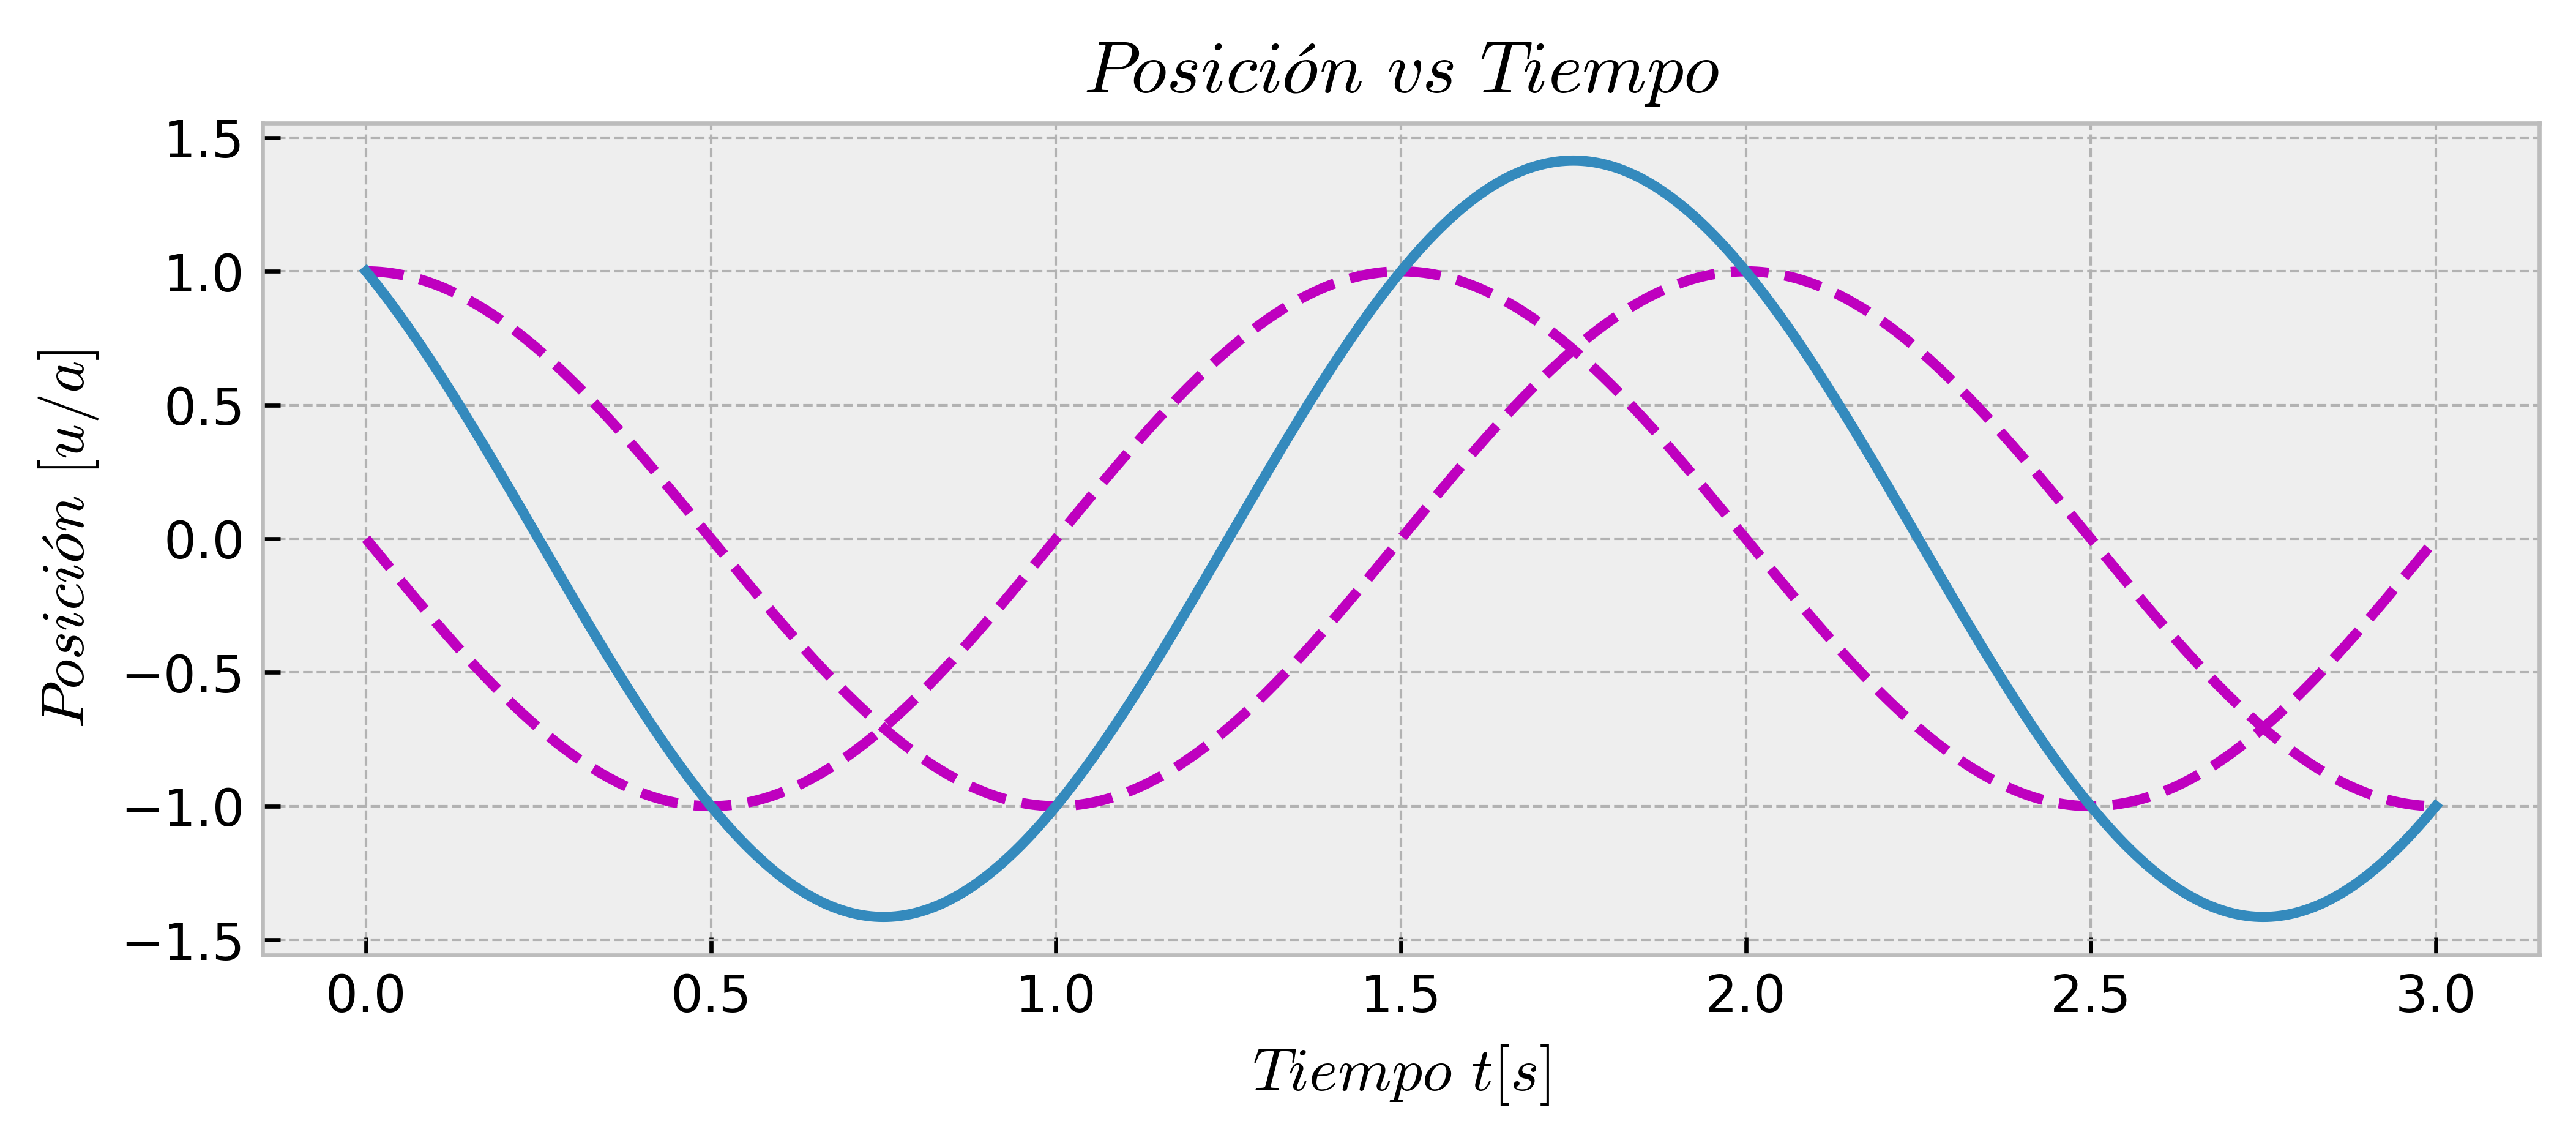

In [ ]:
#definir el valor de la frecuencia en multiplos de pi
omega=np.pi

#Condiciones Iniciales del problema, en cuanto a Amplitudes y constantes de fase:
### Casos Especiales:
### 1. Igual amplitud.
### 2. Igual constante de fase.
### 3. Igual amplitud y constante de fase.
A_1=-1
A_2=1
phi_1=np.pi/2
phi_2=0
###########################################

def coseno (t,cfase):
  return np.cos(omega*t-cfase)

#Cálculo de las nuevas constantes:

A=np.sqrt(A_1**2+A_2**2+2*A_1*A_2*np.cos(phi_2-phi_1))
phi=np.arctan((A_1*np.sin(phi_1)+A_2*np.sin(phi_2))/(A_1*np.cos(phi_1)+A_2*np.cos(phi_2)))

#Graficar...

T=3                      #Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)      # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(t,A_1*coseno(t,phi_1),"m--")
plt.plot(t,A_2*coseno(t,phi_2),"m--")

#La suma pura:
#plt.plot(t,A_2*coseno(t,phi_2)+A_1*coseno(t,phi_1))

#La suma mediante la expresión conseguida:
plt.plot(t,A*coseno(t,phi))

plt.title("$Posición$ $vs$ $Tiempo$")
plt.ylabel(r"$Posición$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

## 2. Dos osciladores de diferente frecuencia con la misma dirección de oscilación y amplitud.

$$x=x_{1}+x_{2}$$

$$x=A\cos(\omega_1 t+\phi_{1}) + A\cos(\omega_2 t+\phi_{2})$$

Usando la identidad del coseno de ángulo medio $\cos(a)+\cos(b)=2\cos\left(\frac{a+b}{2}\right)\cos\left(\frac{a-b}{2}\right)$:

$$x=A[\cos(\omega_1 t+\phi_{1}) + \cos(\omega_2 t+\phi_{2})]$$

$$x=2A\left[\cos\left(\frac{\omega_1+\omega_2}{2} t + \frac{\phi_1+\phi_2}{2}\right)\cos\left(\frac{\omega_1-\omega_2}{2} t + \frac{\phi_1+\phi_2}{2}\right)\right]$$

Redefiniendo $\frac{\omega_1+\omega_2}{2}=\omega$, $\frac{\omega_1-\omega_2}{2}=\Delta\omega$, $\frac{\phi_1+\phi_2}{2}=\phi$ y $\frac{\phi_1-\phi_2}{2}=\Delta\phi$. La función de posición en el tiempo esta dada por:

$$x=\left[2A\cos\left(\Delta\omega t + \Delta\phi\right)\right]\cos\left(\omega t + \phi\right)$$

De esa manera se consigue el producto de dos funciones armónicas, una de baja frecuencia $\Delta\omega$, que corresponde a la semidiferencia de las dos frecuencias y la otra de alta frecuencia $\omega$ que es la frecuencia promedio de las frecuencias originales; dado que $\omega>\Delta\omega$, se puede interpretar la anterior ecuación como un oscilador armónico de frecuencia $\omega$ y amplitud $2A\cos\left(\Delta\omega t + \Delta\phi\right)$.



In [ ]:
import numpy as np                  #Libreria para traer las funciones matemáticas. p.e. seno, coseno y el número pi.
import matplotlib.pyplot as plt     #Libreria para la construcción de gráficos.

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

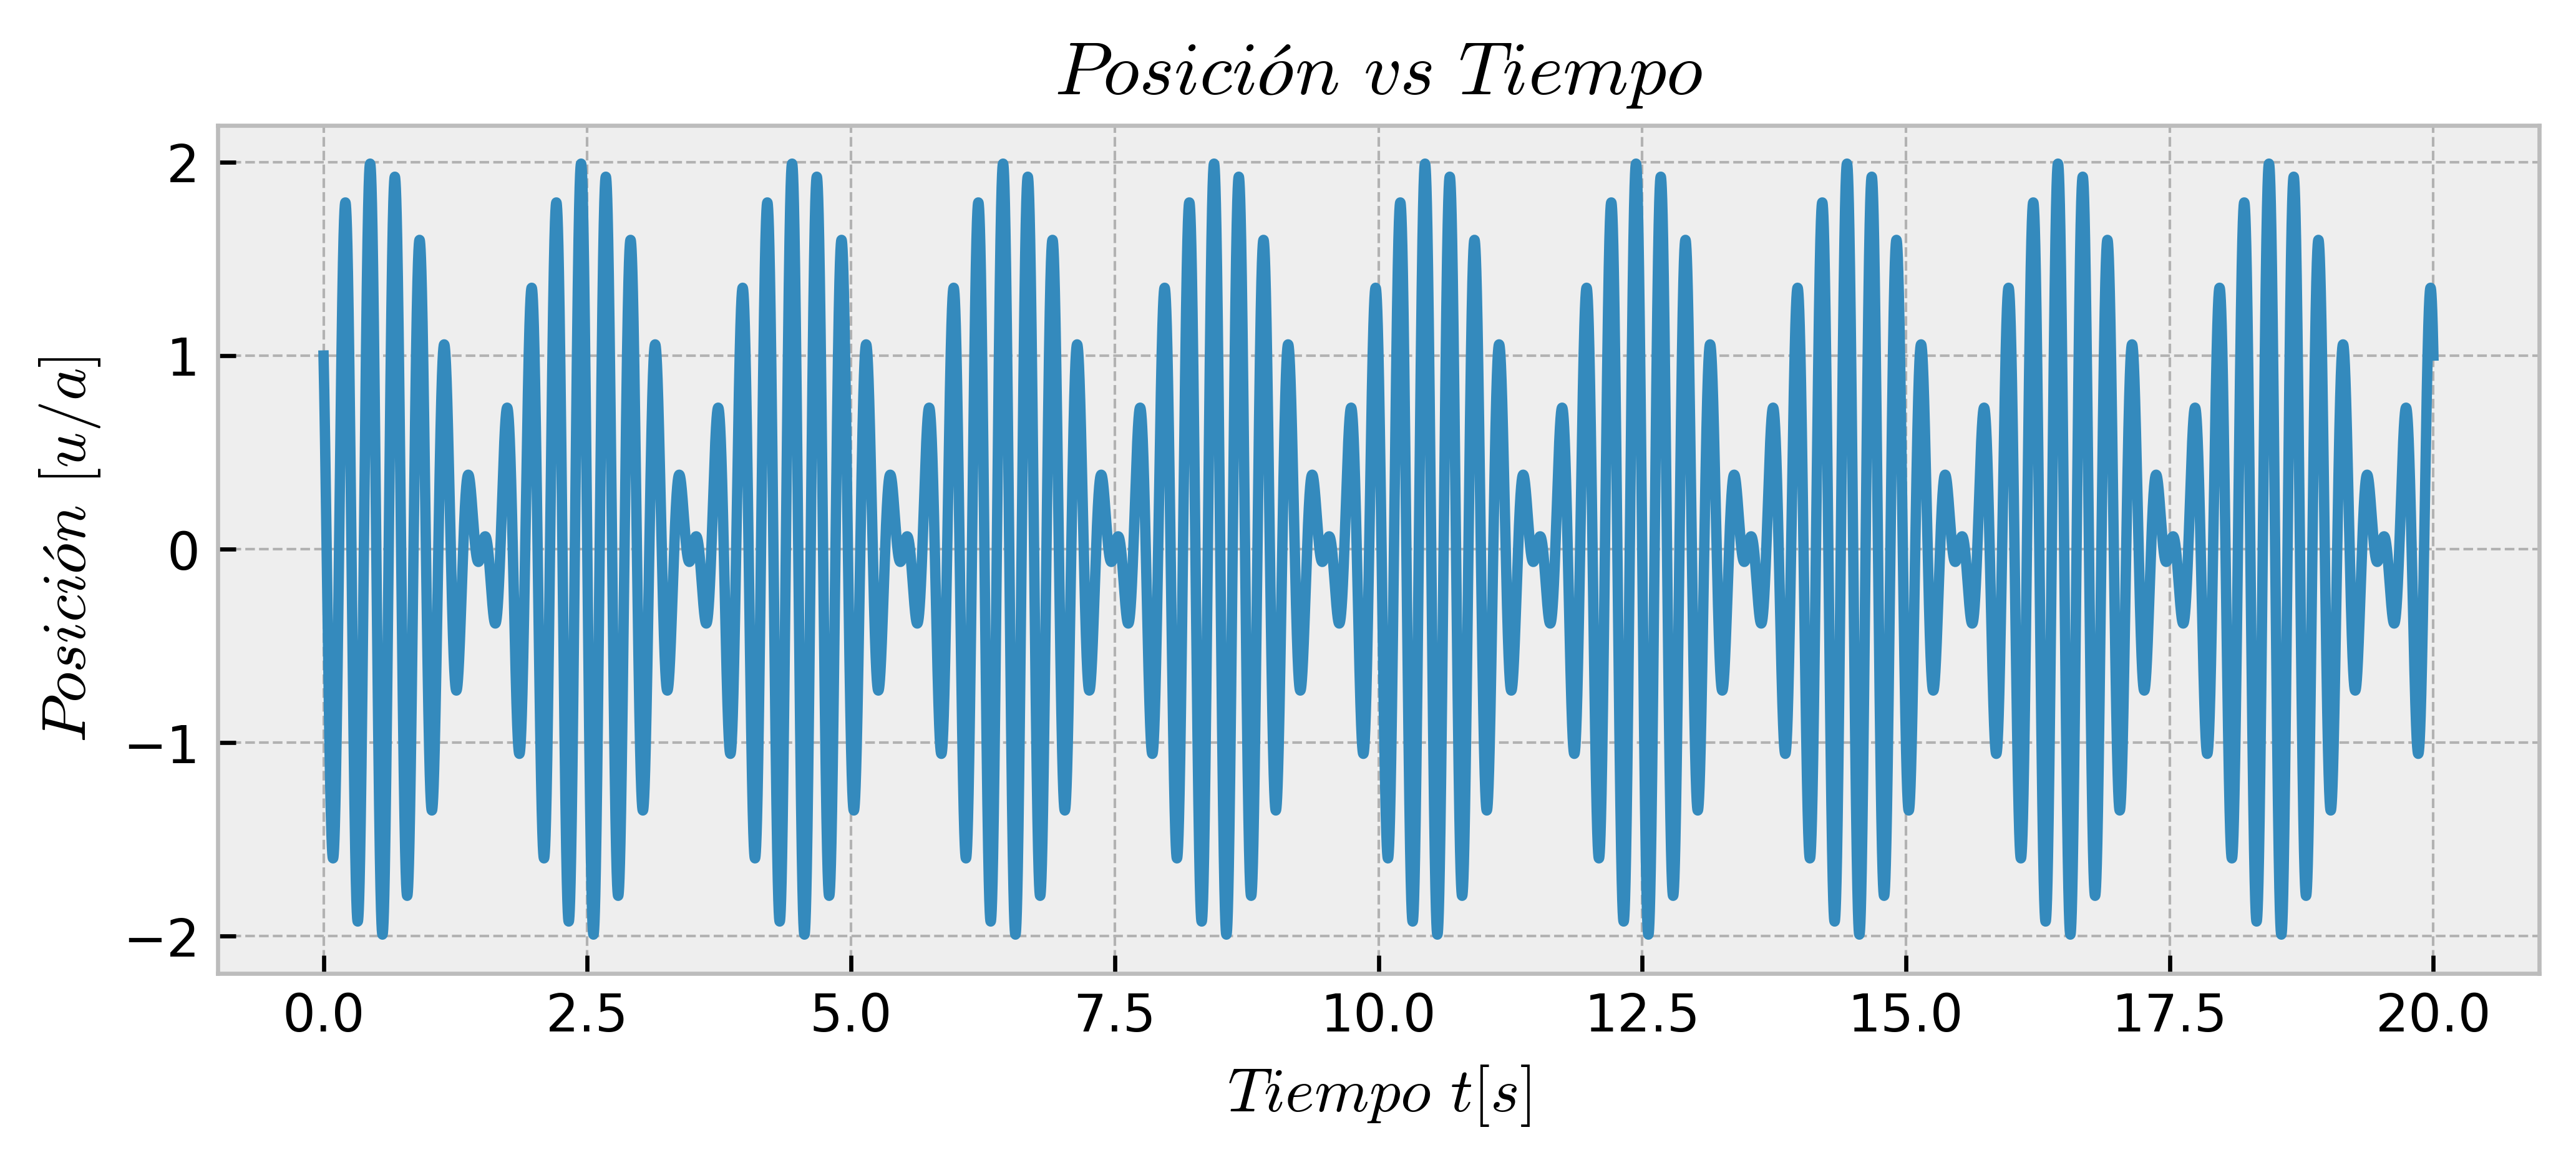

In [ ]:
#Definir el valor de la amplitud.
A=1

#Condiciones Iniciales del problema, en cuanto a frecuencias y constantes de fase:
#definir el valor de las frecuencia en multiplos de pi
omega_1=8*np.pi
omega_2=9*np.pi
phi_1=np.pi/2
phi_2=0
###########################################

def coseno (t,omega,cfase):
  return np.cos(omega*t+cfase)
#Cálculo de las nuevas constantes:

omega=(omega_1+omega_2)/2
deltaomega=((omega_1-omega_2)/2)
phi=(phi_1+phi_2)/2
deltaphi=(phi_1-phi_2)/2

#Graficar...

T=20                     #Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)      # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
#plt.plot(t,A*coseno(t,omega_1,phi_1),"m--")
#plt.plot(t,A*coseno(t,omega_2,phi_2),"m--")

#La suma pura:
#plt.plot(t,A*coseno(t,omega_1,phi_1)+A*coseno(t,omega_2,phi_2))

#La suma mediante la expresión conseguida:
plt.plot(t,2*A*coseno(t,deltaomega,deltaphi)*coseno(t,omega,phi))

#Componente de la grafica correspondiente a la Amplitud (envolvente de la resultante) #Caso denominado amplitud modulada en OEM para frecuencias cercanas - En sonido pulsación ó batido  
#plt.plot(t,2*A*coseno(t,deltaomega,deltaphi))

#Componente de grafica correspondiente a la Frecuencia
#plt.plot(t,2*A*coseno(t,omega,phi))

plt.title("$Posición$ $vs$ $Tiempo$")
plt.ylabel(r"$Posición$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

#Oscilaciones Ortogonales
Se estudiarán las características del movimiento de un cuerpo que se encuentra sometido simultáneamente a dos oscilaciones armónicas ortogonales (direcciones perpendiculares), y describir la trayectoria seguira el cuerpo. 

$$x=A_1\cos(\omega_1 t+\phi_1)$$

y

$$y=A_2\cos(\omega_2 t+\phi_2)$$

Casos a considerar;  

1 Osciladores de igual frecuencias:

a) Constante de fase igual u opuesta.

b) Diferencia de fase de $\Delta\phi=\phi_2-\phi_1=\pm \dfrac{\pi}{2}$.

c) Diferencia de fase $\Delta\phi=\phi_2-\phi_1$ cualqiera.

2 Osciladores de diferente frecuencia.





#Osciladores Amortiguados

La solución conseguida esta dada por:
 $$x(t)=c_1\exp(r_1t)+c_2\exp(r_1t)$$ 
 $$v(t)=r_1c_1\exp(r_1t)+r_2c_2\exp(r_1t)$$ con  $$r_1=-\gamma+\sqrt{\gamma^2-\omega^2}$$ y $$r_2=-\gamma-\sqrt{\gamma^2-\omega^2}$$

Si suponemos condiciones uniciales tal que:

$$x(0)=x_0$$ 
$$v(0)=v_0$$ 

Y las evaluamos en la solución y su derivada conseguimos:

$$x_0=c_1+c_2$$ 
$$v_0=r_1c_1+r_2c_2$$ 

reemplazando se consigue:

$$x_0=c_1+c_2$$ 
$$v_0=(-\gamma+\sqrt{\gamma^2-\omega^2})c_1+(-\gamma-\sqrt{\gamma^2-\omega^2})c_2$$

En forma matricial se consigue la siguiente generalidad.

$$\begin{vmatrix}
1 & 1\\ 
-\gamma+\sqrt{\gamma^2-\omega^2} & -\gamma-\sqrt{\gamma^2-\omega^2}
\end{vmatrix}
\begin{vmatrix}
c_1 \\ 
c_2 
\end{vmatrix} =
\begin{vmatrix}
x_0 \\ 
v_0 
\end{vmatrix}$$

Soluciondo para $c_1$: 

$$
c_1=\frac{\begin{vmatrix}
x_0 & 1\\ 
v_0 & -\gamma-\sqrt{\gamma^2-\omega^2}
\end{vmatrix}}
{\begin{vmatrix}
1 & 1\\ 
-\gamma+\sqrt{\gamma^2-\omega^2} & -\gamma-\sqrt{\gamma^2-\omega^2}
\end{vmatrix}}=\frac{x_0(\gamma+\sqrt{\gamma^2-\omega^2})+v_0}{2\sqrt{\gamma^2-\omega^2}}
$$

y para $c_2$:

$$
c_2=\frac{\begin{vmatrix}
1 & x_0\\ 
-\gamma+\sqrt{\gamma^2-\omega^2} & v_0
\end{vmatrix}}{\begin{vmatrix}
1 & 1\\ 
-\gamma+\sqrt{\gamma^2-\omega^2} & -\gamma-\sqrt{\gamma^2-\omega^2}
\end{vmatrix}}=\frac{v_0+x_0(\gamma-\sqrt{\gamma^2-\omega^2})}{-2\sqrt{\gamma^2-\omega^2}}
$$

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(5,2)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

###Oscilaciones Sobreamortiguadas: 

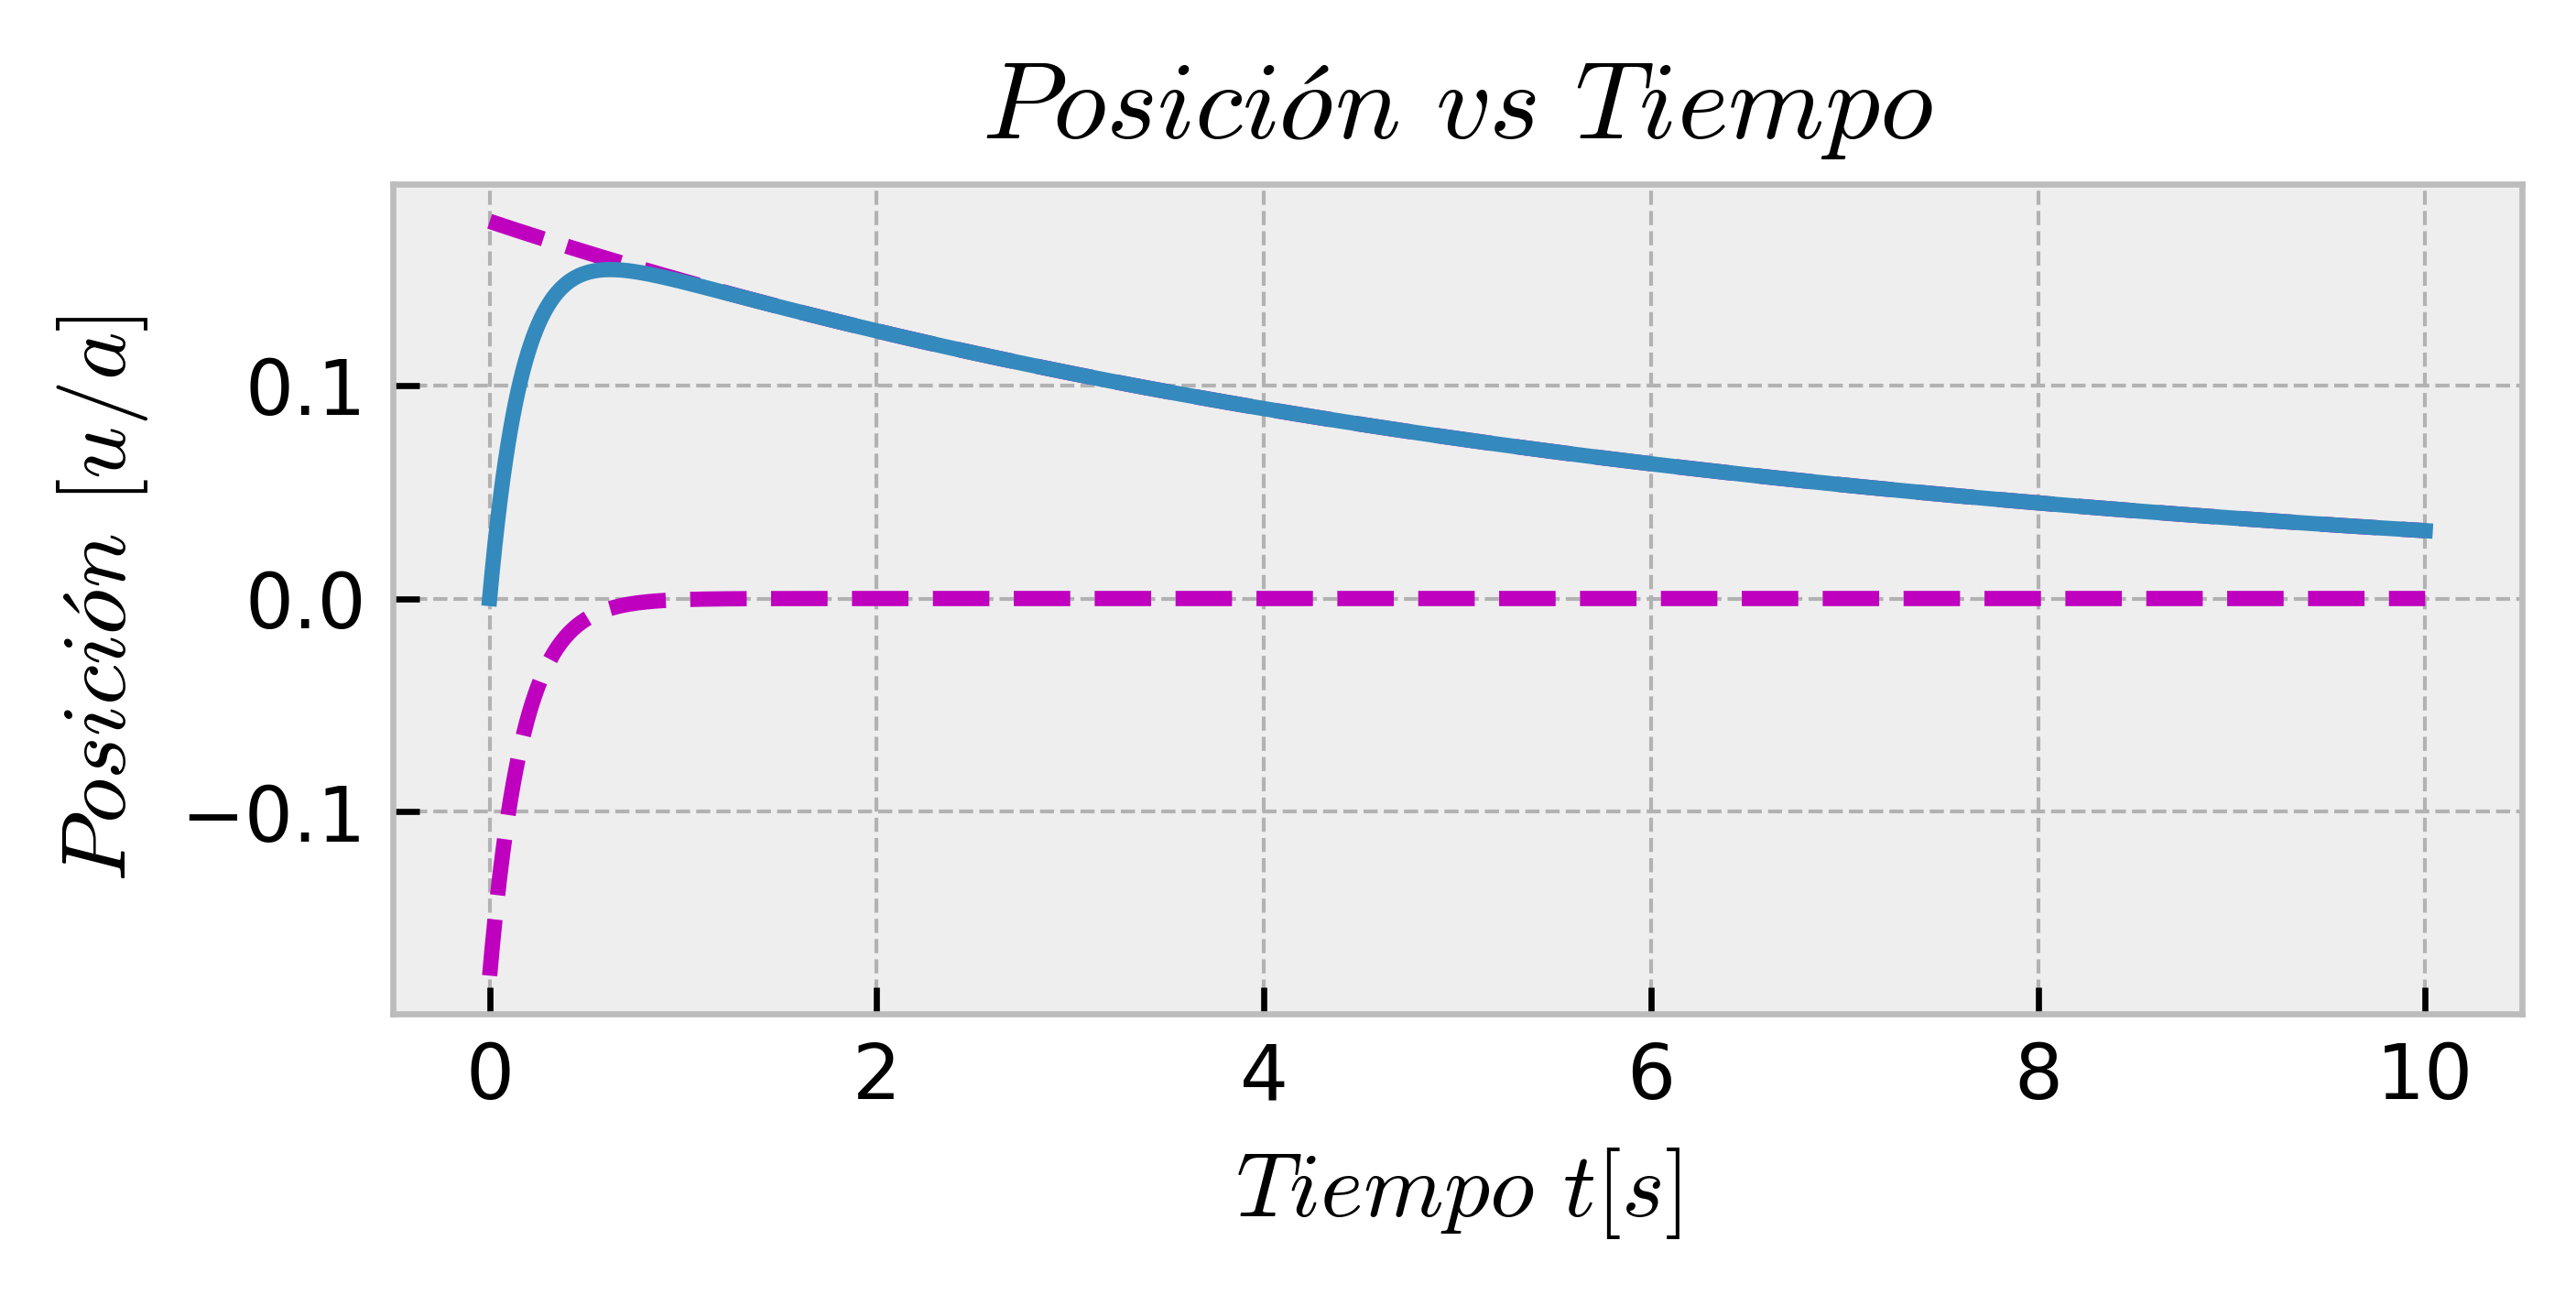

In [ ]:
#Condiciones Iniciales
omega=1               #Debe ser menor que gamma presto a que tenemos oscilaciones sobreamortiguadas
gamma=3               #Debe ser mayor que omega presto a que tenemos oscilaciones sobreamortiguadas
x_0=0                #Posición inicial (en t=0).
v_0=1                 #Velocidad inicial (en t=0).

#Calculo de las constantes c1 y c2. Estas dependen de las condiciones iniciales.
c1=(x_0*((gamma+np.sqrt(gamma**2-omega**2)))+(v_0))/(2*np.sqrt(gamma**2-omega**2))
c2=(v_0+x_0*((gamma-np.sqrt(gamma**2-omega**2))))/(-2*np.sqrt(gamma**2-omega**2))

def exponencialuno(t):
  return np.exp((-gamma+np.sqrt(gamma**2-omega**2))*t)

def exponencialdos(t):
  return np.exp((-gamma-np.sqrt(gamma**2-omega**2))*t)

T=10                       #Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)      # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(t,c1*exponencialuno(t),"m--")
plt.plot(t,c2*exponencialdos(t),"m--")
plt.plot(t,c1*exponencialuno(t)+c2*exponencialdos(t))
plt.title("$Posición$ $vs$ $Tiempo$")
plt.ylabel(r"$Posición$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

##Oscilaciones criticamente amortiguadas

La solución conseguida esta dada por:
 $$x(t)=c_1\exp(r_1t)+c_2\exp(r_2t)$$ 
 
 con  
 
 $$r_1=-\gamma+\sqrt{\gamma^2-\omega^2}$$ y $$r_2=-\gamma-\sqrt{\gamma^2-\omega^2}$$

Donde $\gamma=\omega$ y así $r_1=r_2=-\gamma$. Donde la solución quedaria escrita como:

$$x(t)=(c_1+c_2t)\exp(-\gamma t)$$ 

y la velocidad como:

$$v(t)=(c_2(1-\gamma t)-\gamma c_1)\exp(-\gamma t)$$ 

Si suponemos condiciones uniciales tal que:

$$x(0)=x_0$$ 
$$v(0)=v_0$$ 

Y las evaluamos en la solución y su derivada conseguimos:

$$x_0=c_1$$ 
$$v_0=c_2-\gamma x_0$$ 

Soluciondo para $c_1$: 

$$c_1=x_0$$ 

y para $c_2$:

$$c_2=v_0+\gamma x_0$$

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

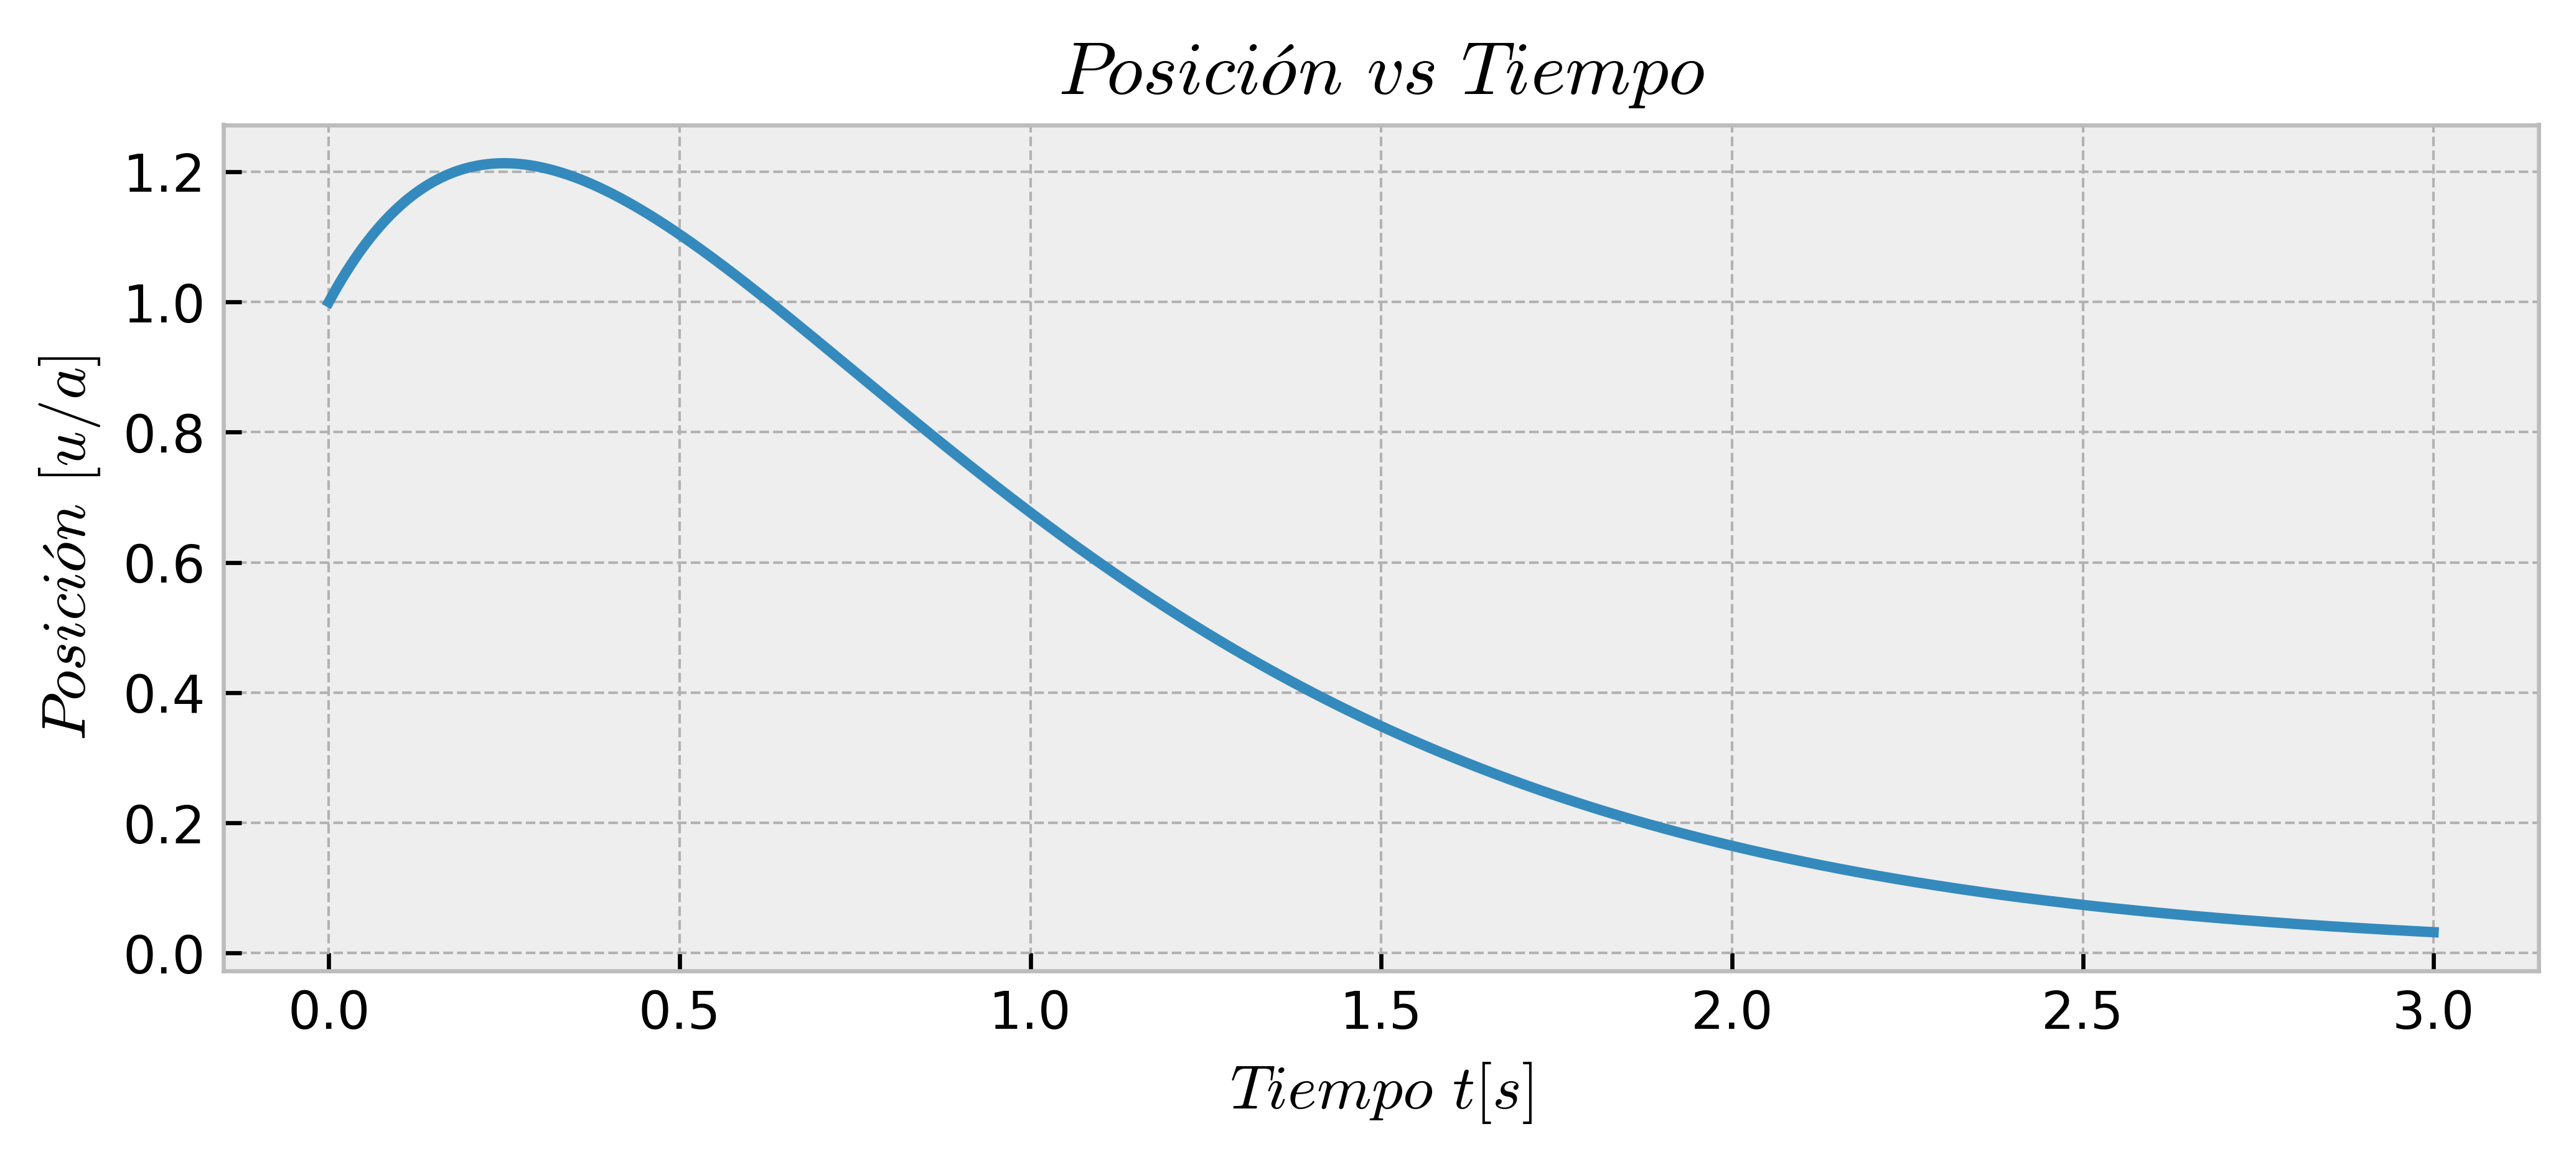

In [ ]:
#Condiciones Iniciales
gamma=2                   #Debe ser IGUAL a OMEGA presto a que tenemos oscilaciones criticamente amortiguadas
x_0=1                     #Posición inicial (en t=0).
v_0=2                  #Velocidad inicial (en t=0).

#Calculo de las constantes c1 y c2. Estas dependen de las condiciones iniciales.
c1=x_0
c2=v_0+x_0*gamma

def exponencial(t):
  return np.exp(-gamma*t)

T=3                       #Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)      # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(t,(c1+c2*t)*exponencial(t))
plt.title("$Posición$ $vs$ $Tiempo$")
plt.ylabel(r"$Posición$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

##Decaimentos Exponenciales


##Oscilaciones subamortiguadas

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

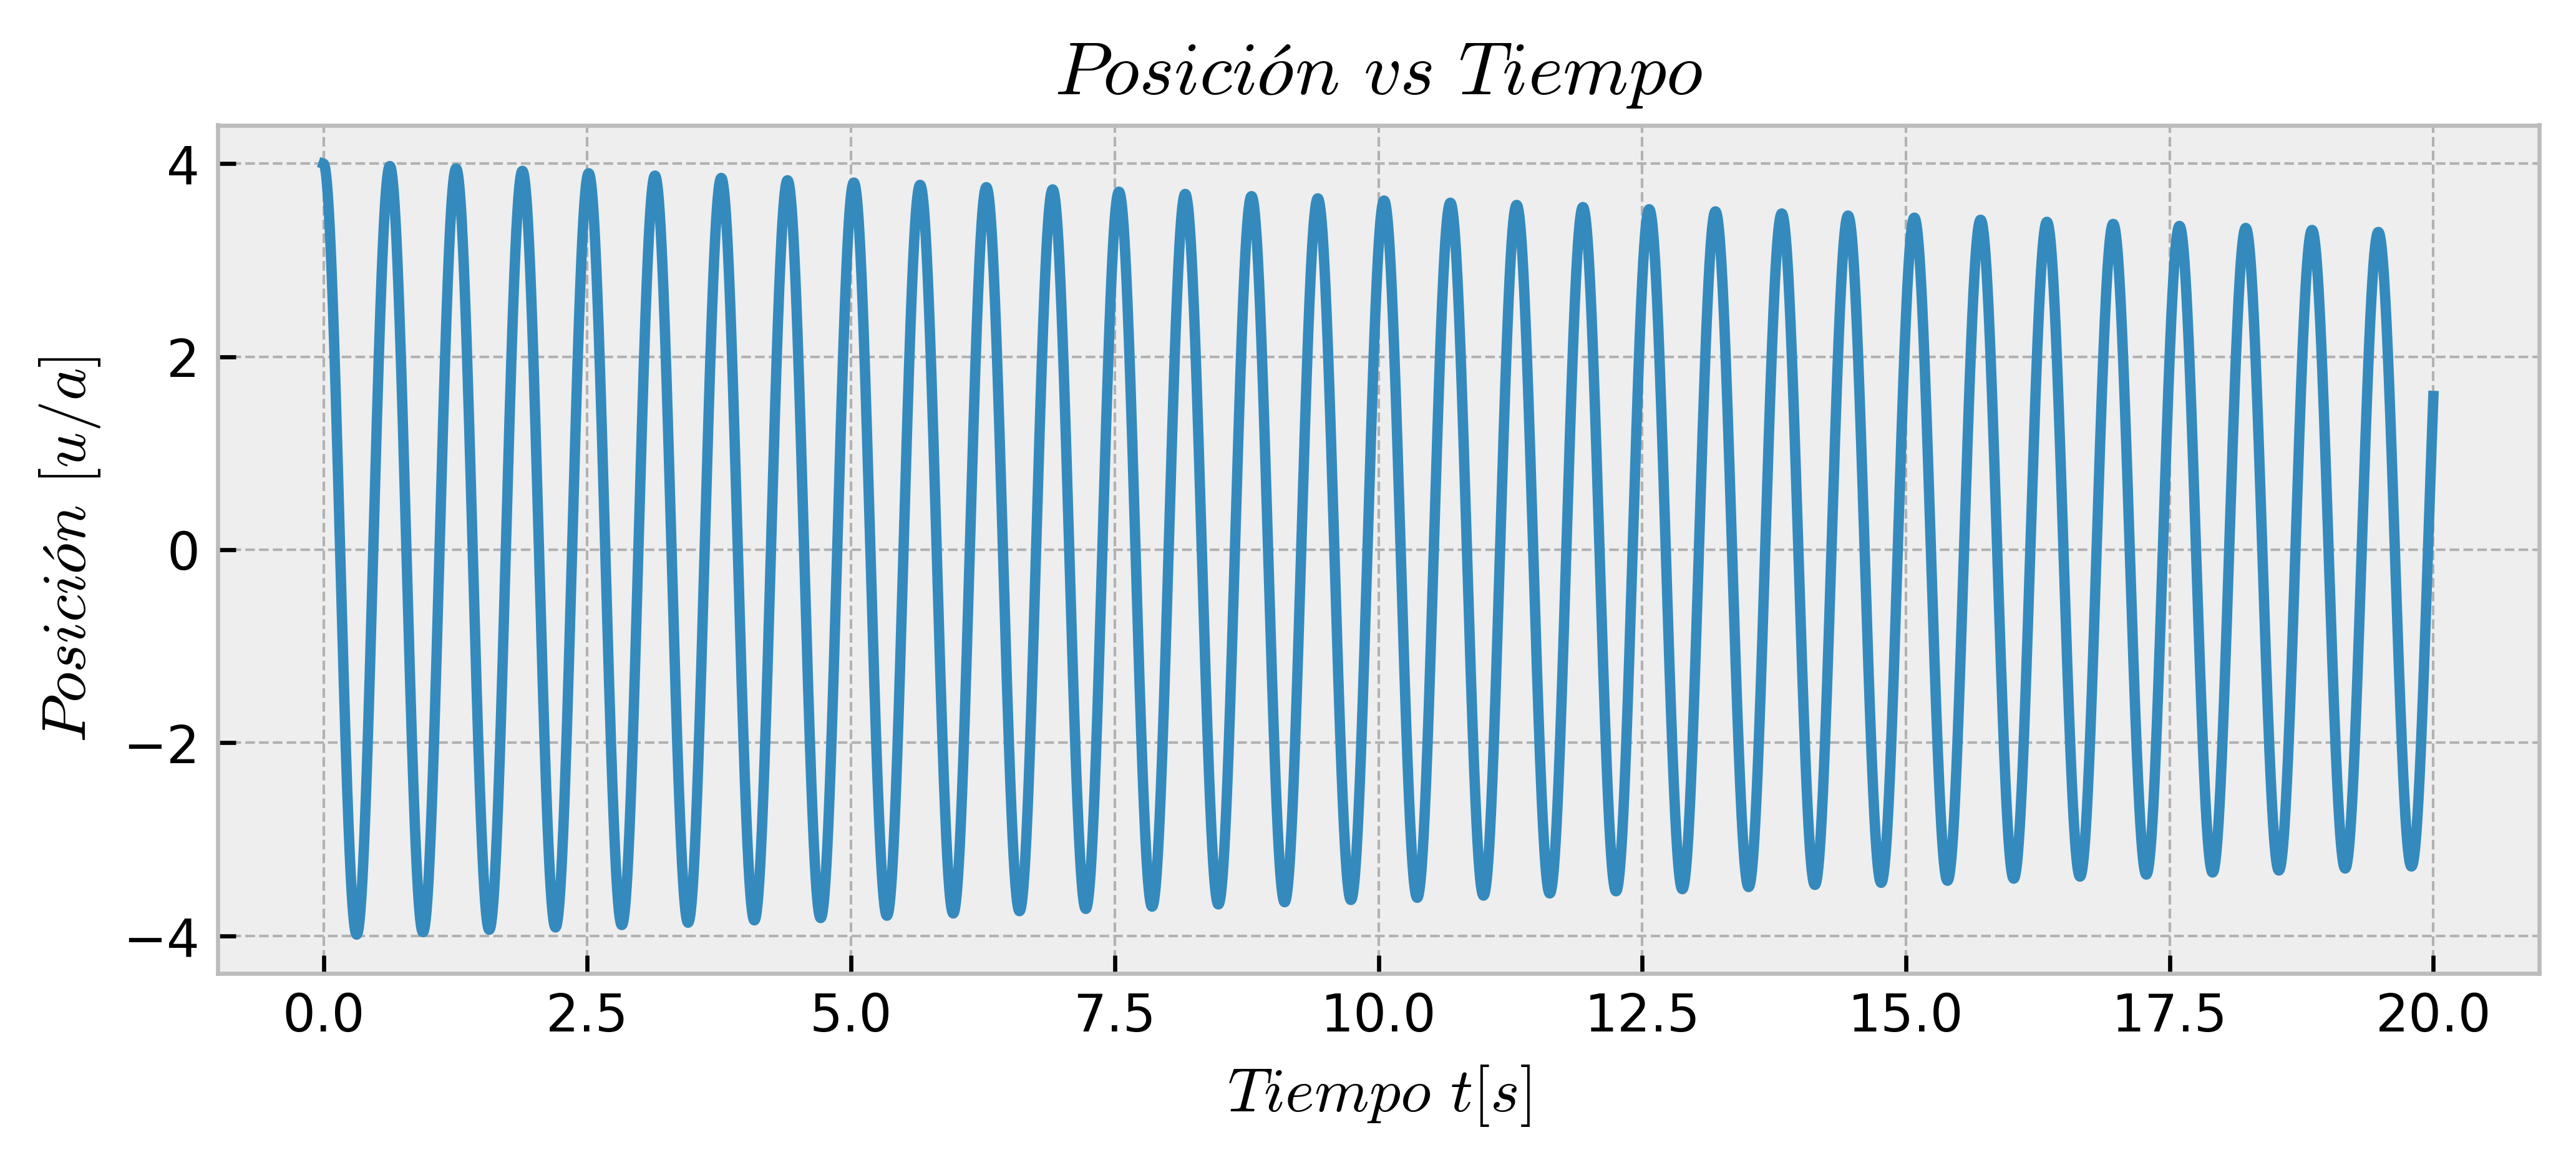

In [ ]:
#Condiciones Iniciales
gamma=0.01                   #Debe ser MENOR a OMEGA presto a que tenemos oscilaciones subamortiguadas
omega=10                   #Debe ser MAYOR a OMEGA presto a que tenemos oscilaciones subamortiguadas
x_0=4                     #Posición inicial (en t=0).
v_0=0                     #Velocidad inicial (en t=0).

#Calculo de las constantes c1 y c2. Estas dependen de las condiciones iniciales.
c1=(v_0+x_0*gamma)/omega
c2=x_0

def exponencial(t):
  return np.exp(-gamma*t)

def seno(t):
  return np.sin(omega*t)

def coseno(t):
  return np.cos(omega*t)

T=20                        # Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)       # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
#plt.plot(t,exponencial(t),"m--")
#plt.plot(t,(c1*seno(t)+c2*coseno(t)),"m--")
plt.plot(t,exponencial(t)*(c1*seno(t)+c2*coseno(t)))
plt.title("$Posición$ $vs$ $Tiempo$")
plt.ylabel(r"$Posición$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

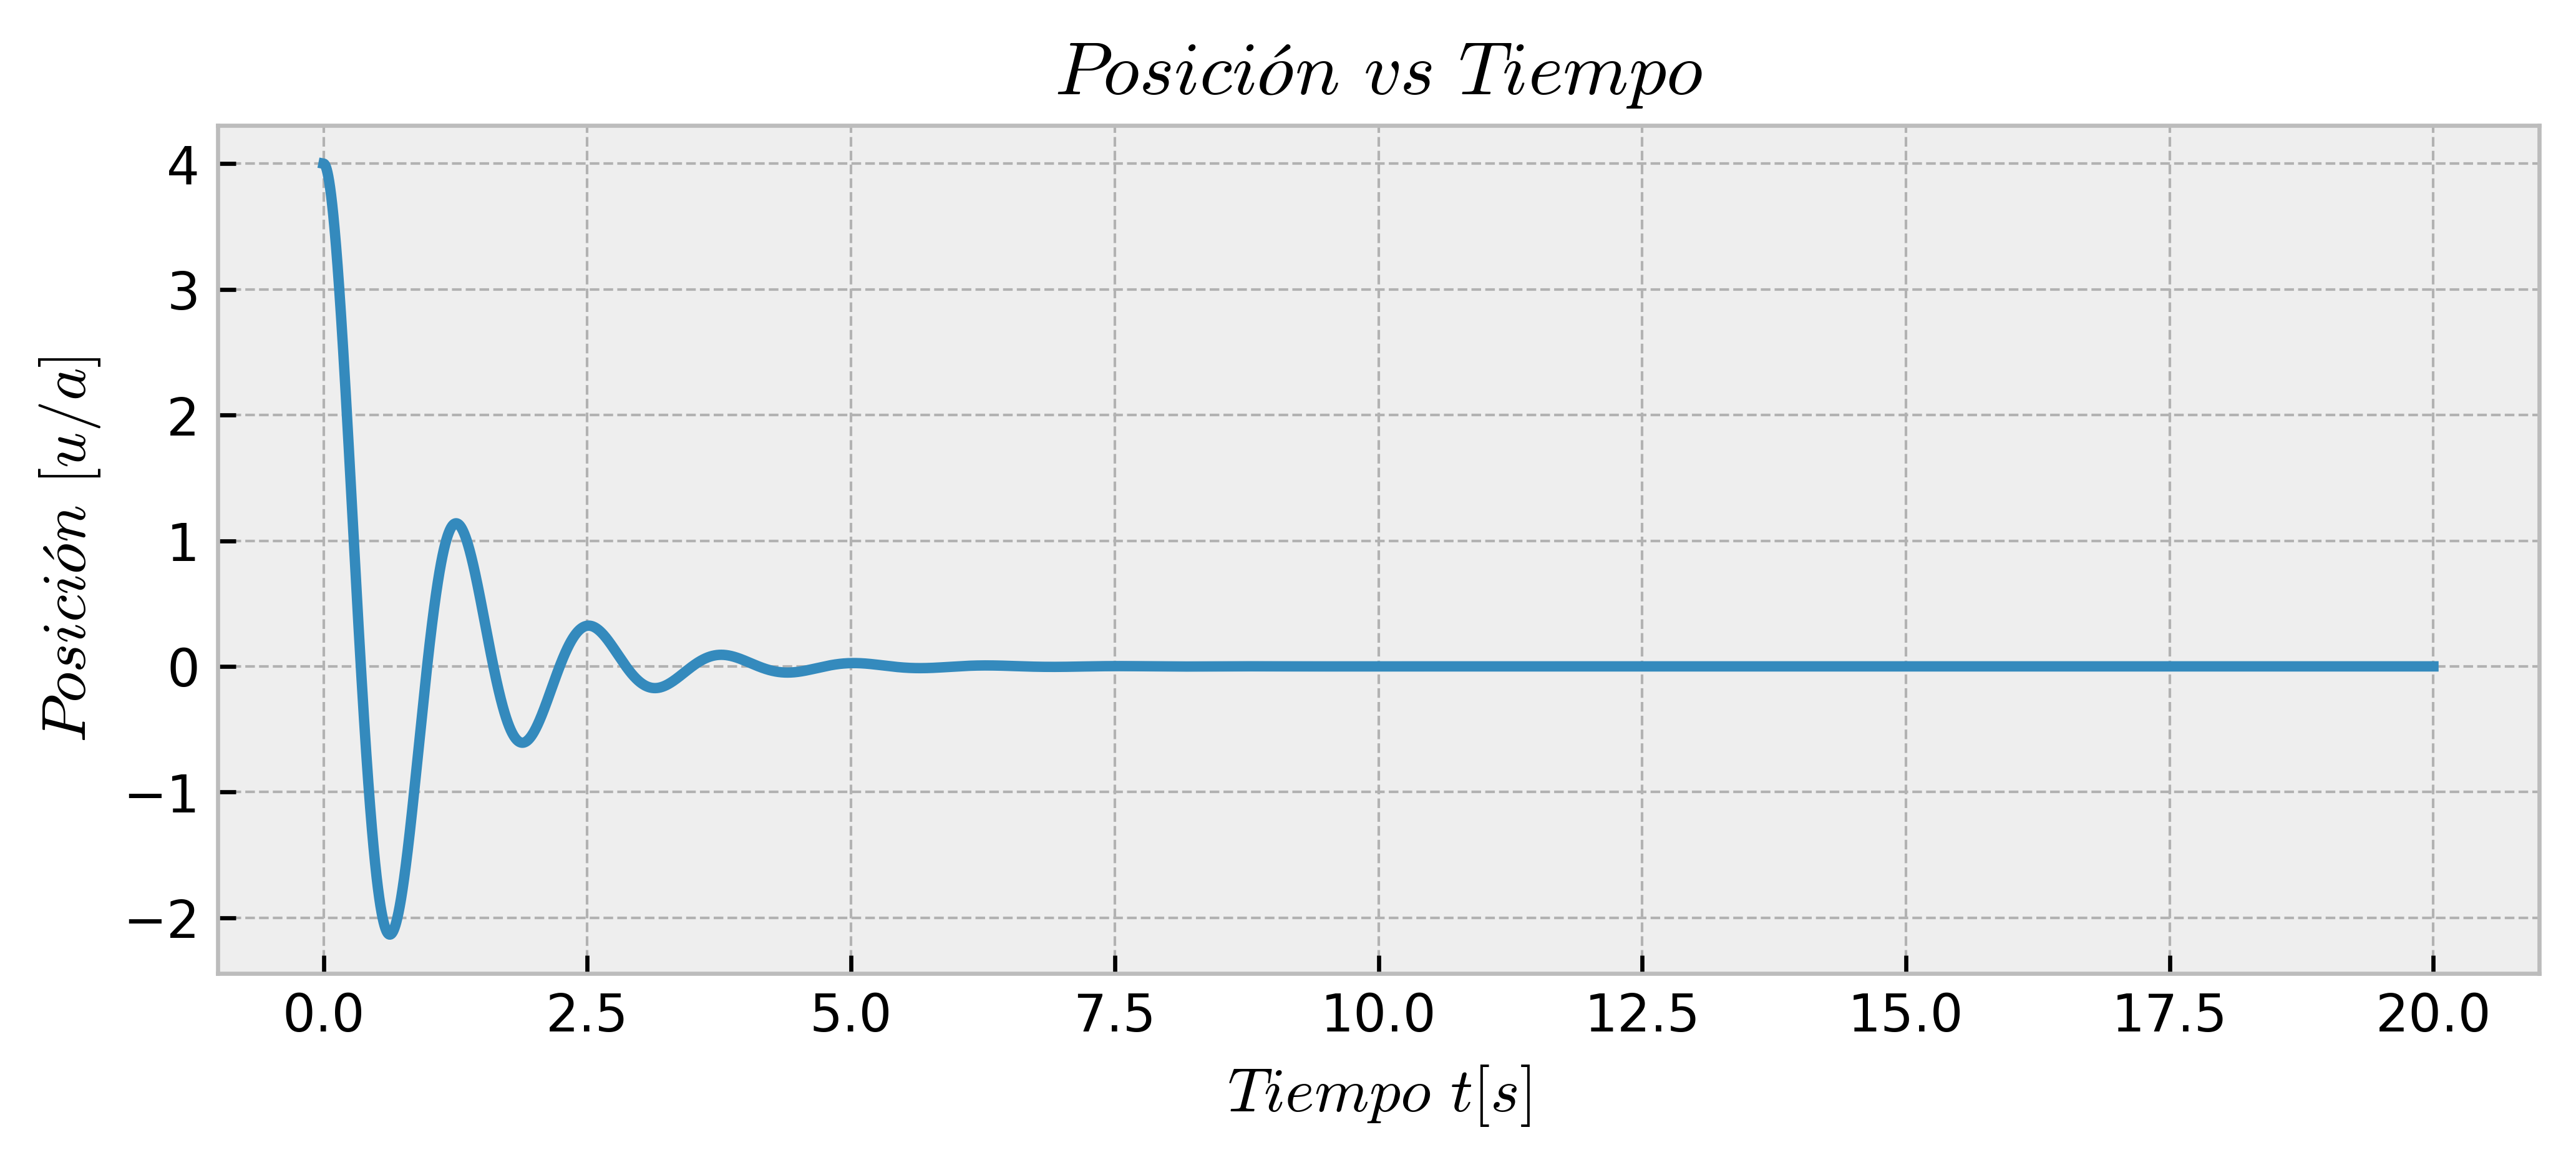

In [ ]:
#Condiciones Iniciales
gamma=1                     #Debe ser MENOR a OMEGA presto a que tenemos oscilaciones subamortiguadas
omega=5                     #Debe ser MAYOR a OMEGA presto a que tenemos oscilaciones subamortiguadas
x_0=4                         #Posición inicial (en t=0).
v_0=0                         #Velocidad inicial (en t=0).

#Calculo de las constantes c1 y c2. Estas dependen de las condiciones iniciales.
c1=(v_0+x_0*gamma)/omega
c2=x_0
A=np.sqrt(c1**2+c2**2)
phi=np.arctan(c2/c1)

def exponencial(t):
  return np.exp(-gamma*t)

def seno(t):
  return np.sin(omega*t+phi)

T=20                         # Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)       # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
#plt.plot(t,A*exponencial(t),"m--")
#plt.plot(t,A*seno(t))
#plt.plot(t,-A*exponencial(t),"m--")
plt.plot(t,A*exponencial(t)*seno(t))
plt.title("$Posición$ $vs$ $Tiempo$")
plt.ylabel(r"$Posición$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

#Energía de un Oscilador Amortiguado

La energía del oscilador amortiguado queda definida por:

$$E=\frac{1}{2}m\omega_{0}^2A^2 e^{-2\gamma t}\left(1-\frac{\gamma}{\omega_{0}}\sin(2(\omega_{0}t+\phi)) \right) $$

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

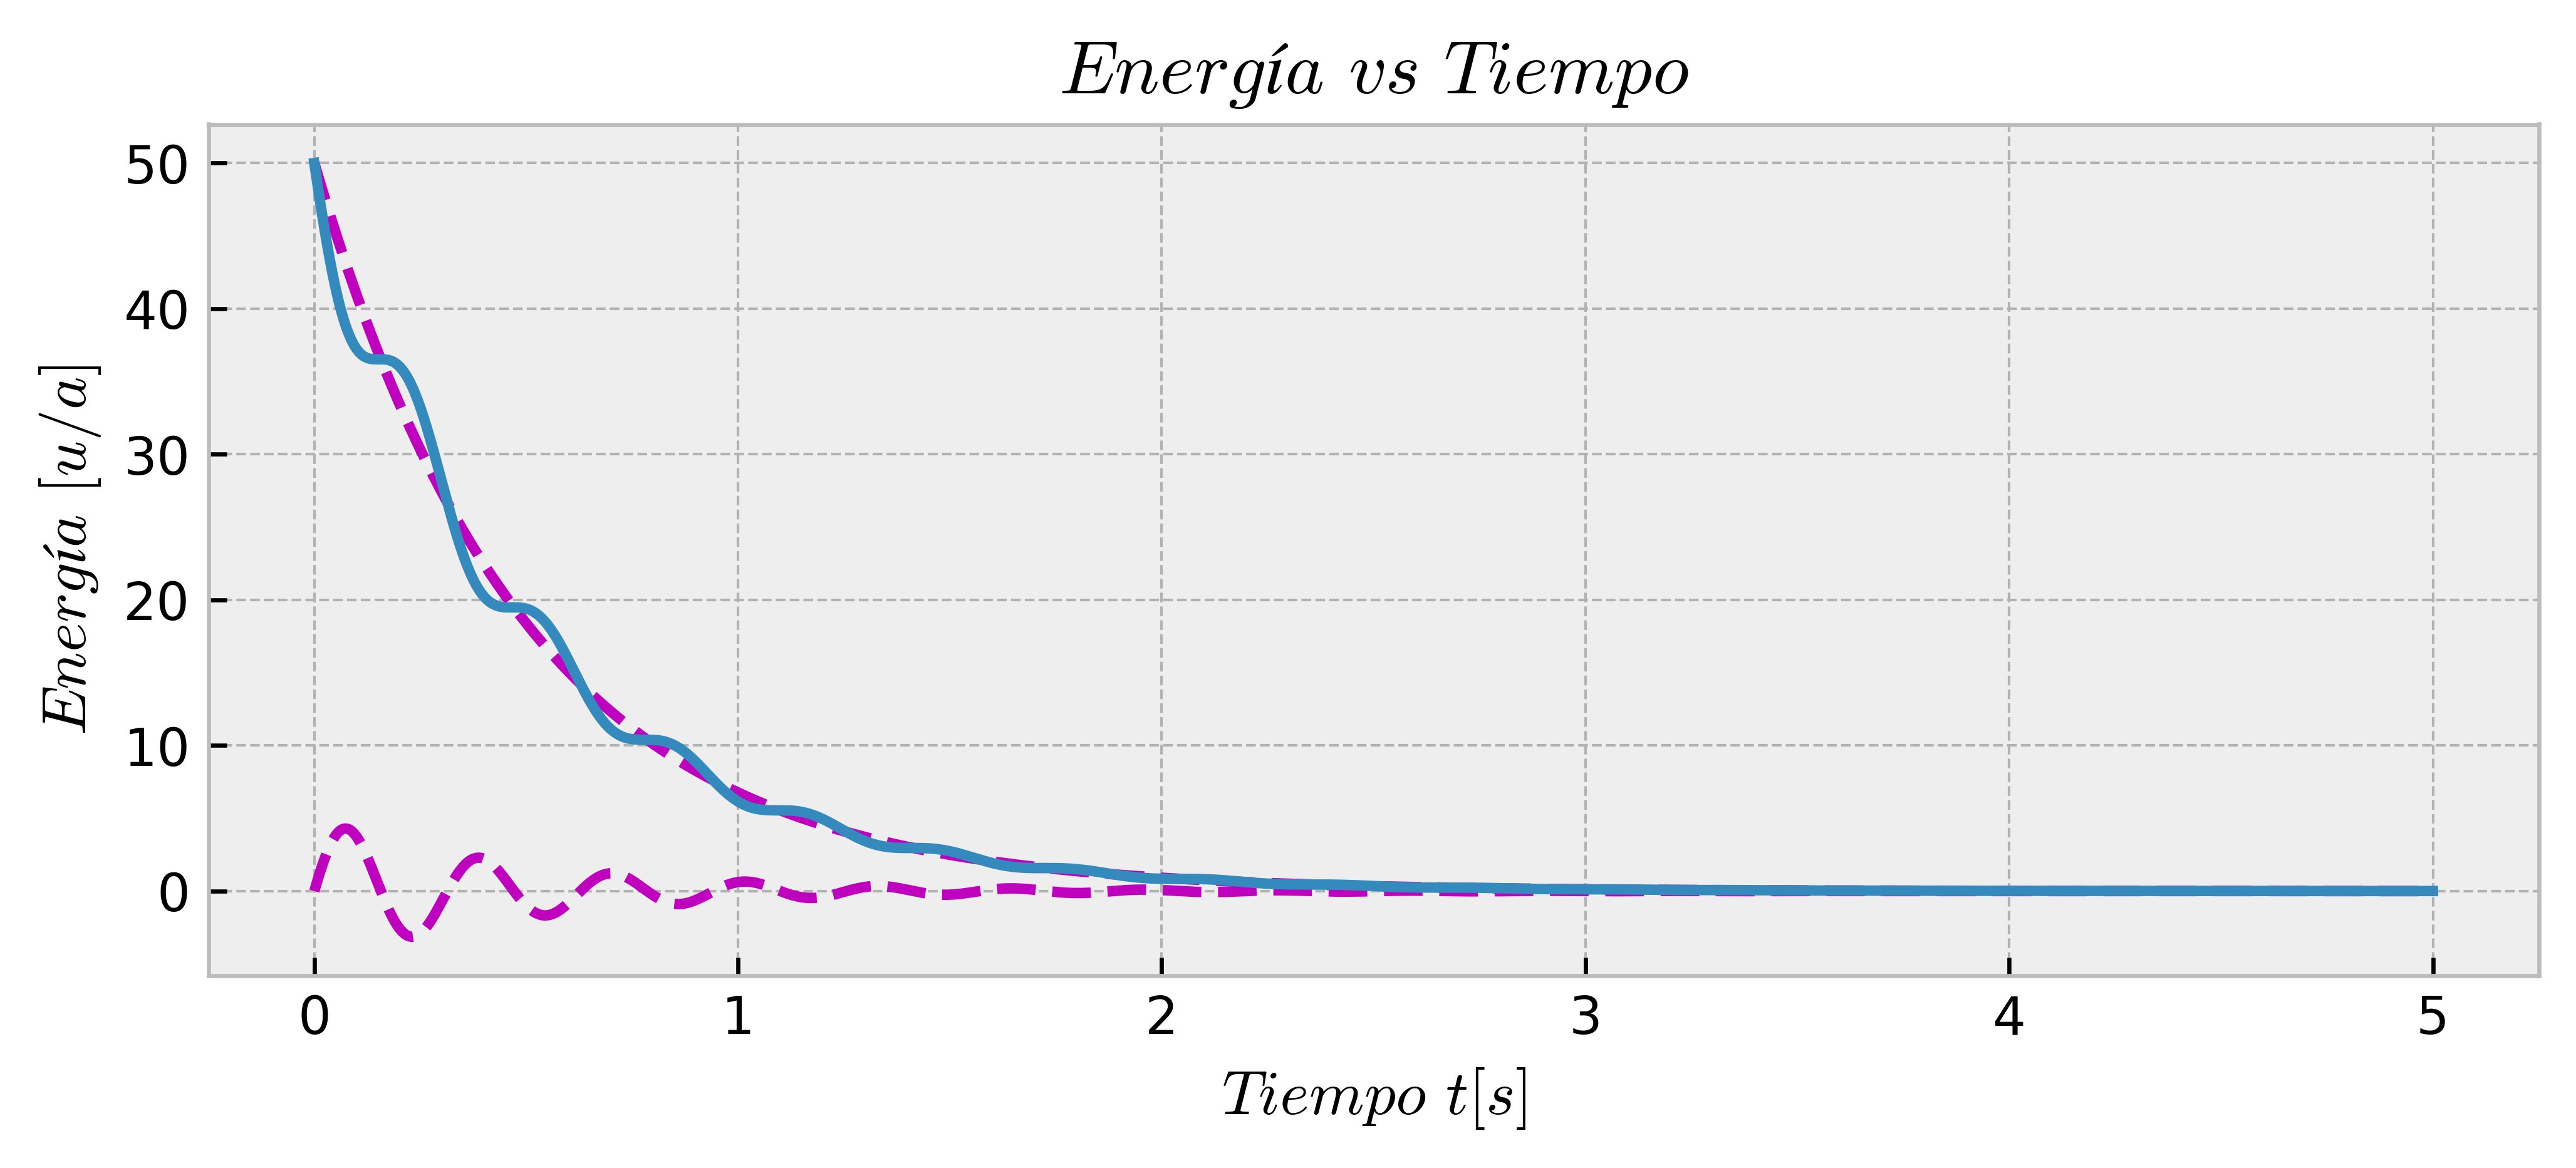

In [ ]:
#Condiciones Iniciales
gamma=1                    #Debe ser MENOR a OMEGA presto a que tenemos oscilaciones subamortiguadas
omega=10                     #Debe ser MAYOR a OMEGA presto a que tenemos oscilaciones subamortiguadas
m=1                           #Masa
A=1                           #Amplitud
phi=0

def exponencial(t):
  return np.exp(-2*gamma*t)

def seno(t):
  return np.sin(2*(omega*t+phi))

T=5                         # Hasta que segundo graficar ejemplo 10s.
n=100000                     # Numero de puntos a graficar.
t=np.linspace(0,T,n+1)       # Definición del tiempo a graficar.

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(t,1/2*m*omega**2*A**2*exponencial(t),"m--")
plt.plot(t,1/2*m*omega**2*A**2*exponencial(t)*(gamma/omega)*seno(t),"m--")
plt.plot(t,1/2*m*omega**2*A**2*exponencial(t)*(1-(gamma/omega)*seno(t)))
plt.title("$Energía$ $vs$ $Tiempo$")
plt.ylabel(r"$Energía$ $[u/a]$")
plt.xlabel(r"$Tiempo$ $t[s]$")
plt.show()

#Oscilaciones Forzadas No-Amortiguadas:

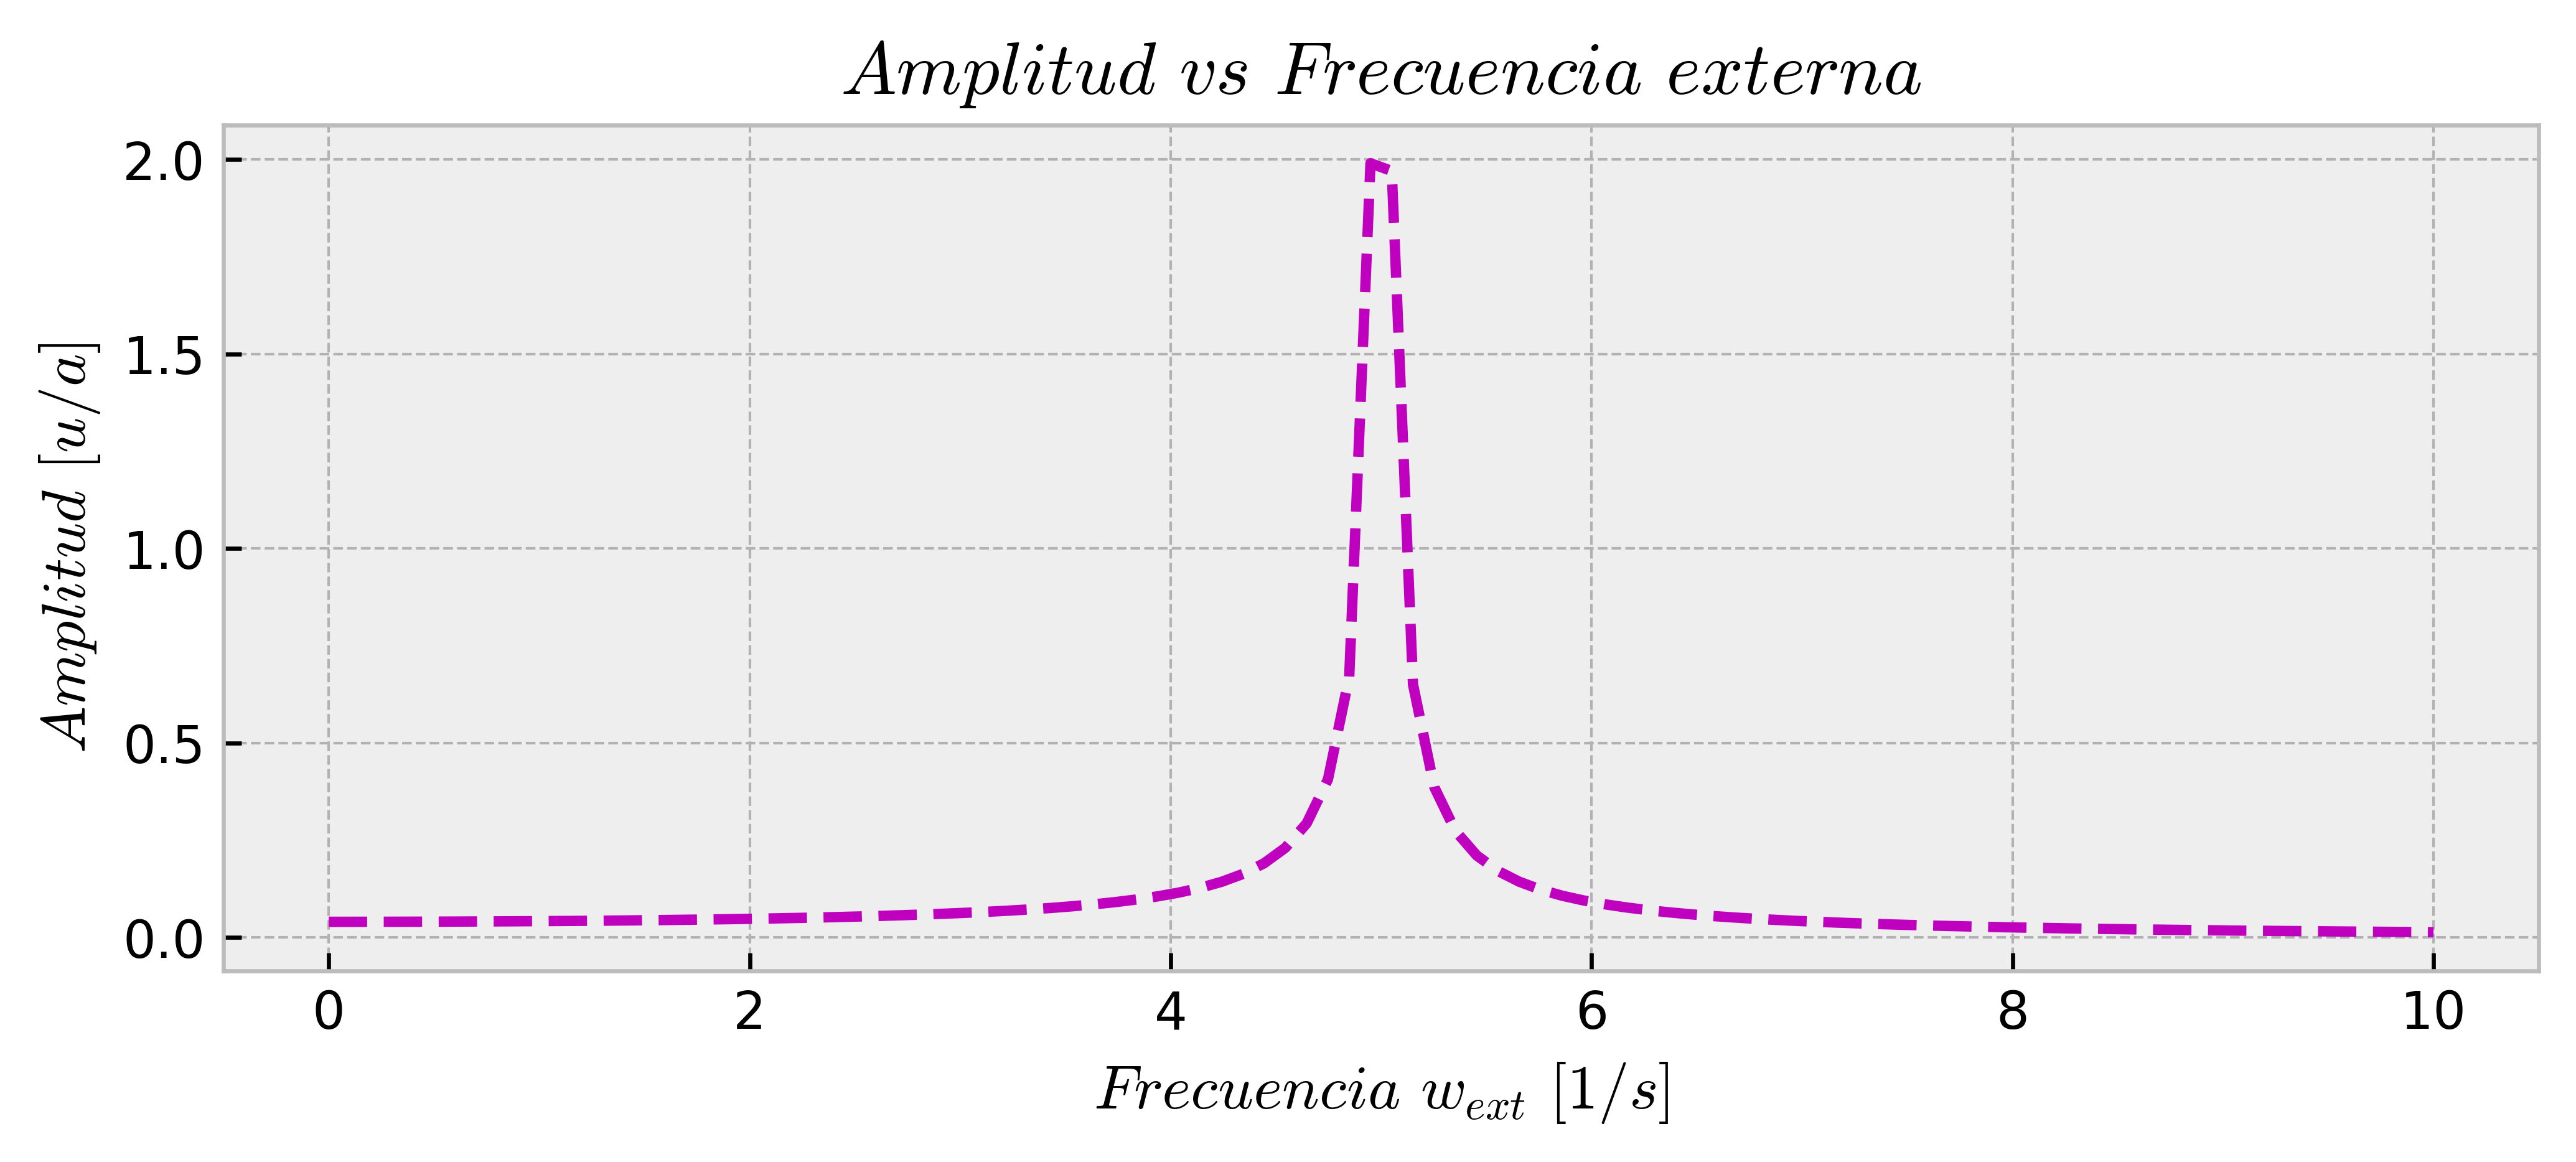

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

F0=1
m=1
w0=5

def A(wext):
  raiz=np.sqrt((F0/(m*(w0*w0-wext*wext)))*(F0/(m*(w0*w0-wext*wext))))
  return (raiz)

wext=np.linspace(0,10,100)

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(wext,A(wext), "m--")
plt.title("$Amplitud$ $vs$ $Frecuencia$ $externa$")
plt.ylabel(r"$Amplitud$ $[u/a]$")
plt.xlabel(r"$Frecuencia$ $w_{ext}$ $[1/s]$")
plt.show()



#Oscilaciones Forzadas Amortiguadas:

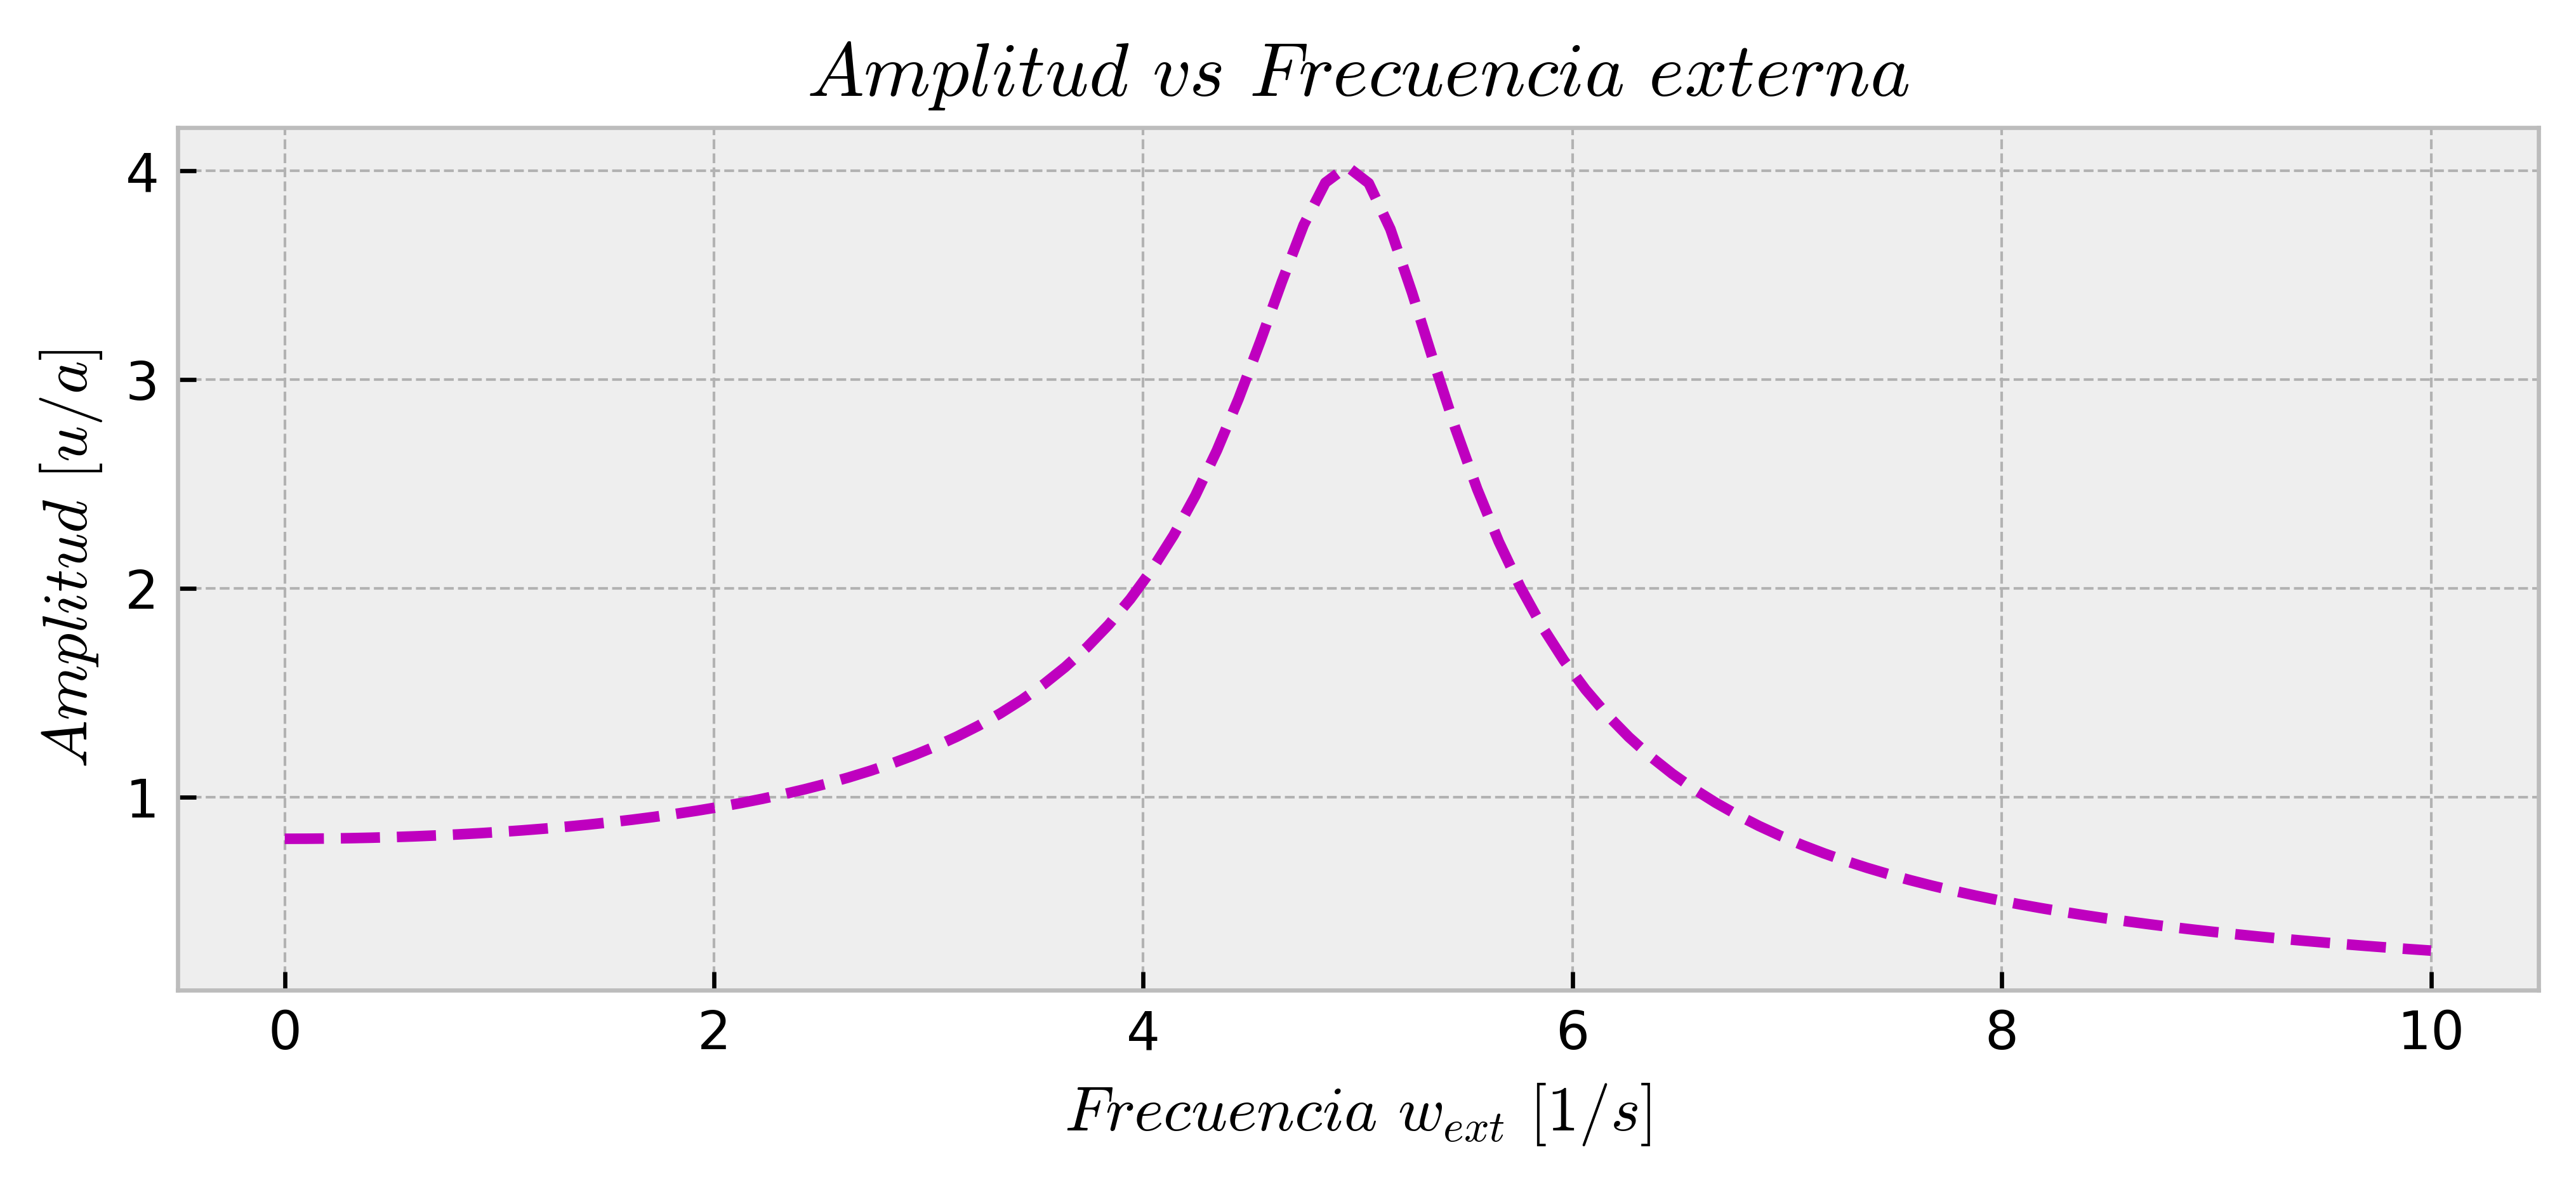

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use ("bmh")               # estilo
figsize=(8,3)                       #8x3 pulgadas
dpi=600                             # Resolucion de figura

F0=100
m=5
w0=5
gamma=0.5

def A(wext):
  raiz=np.sqrt(((w0*w0-wext*wext)*(w0*w0-wext*wext))+4*gamma*gamma*wext*wext)
  raiz=F0/(m*raiz)
  return (raiz)

wext=np.linspace(0,10,100)

plt.figure(figsize=figsize,dpi=dpi)
plt.plot(wext,A(wext), "m--")
plt.title("$Amplitud$ $vs$ $Frecuencia$ $externa$")
plt.ylabel(r"$Amplitud$ $[u/a]$")
plt.xlabel(r"$Frecuencia$ $w_{ext}$ $[1/s]$")
plt.show()


### N OSCILADORES ACOPLADOS - MODOS NORMALES
Cadena Lineal de Partes Moviles - Oscilaciones Transversales Cuentas Identicas

## Relación de Dispersión

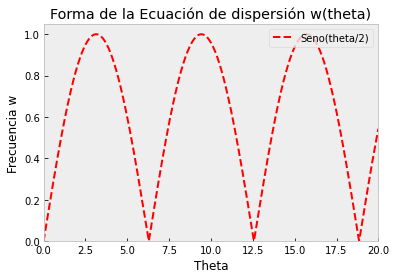

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def w(theta):
  return abs(np.sin(theta/2))

theta=np.linspace(0,20,1000)

def primera(theta):
  return abs(np.sin(theta/2))

#LISTA.... Para los ejes
v=[0,20,0,1.05]

plt.plot(theta,w(theta),"r--", label="Seno(theta/2)")
plt.xlabel('Theta')
plt.ylabel("Frecuencia w")
plt.title("Forma de la Ecuación de dispersión w(theta)")
plt.legend(loc=1)
plt.axis(v)
plt.grid()

## Modos para Extremos Fijos
Grafica de modos normales, 

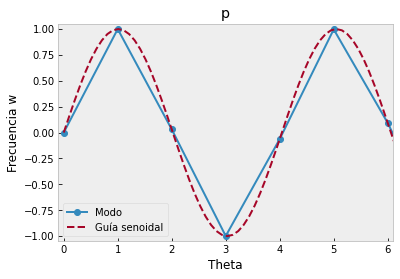

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

N=100
p=50

def psi(n):
  return np.sin((p*pi*n)/(N+1))

def guia(x):
  return np.sin((p*pi*x)/(N+1))

x=np.linspace(0,10,100)
n=np.linspace(0,10,11)

#LISTA.... Para los ejes
v=[-0.1,6.1,-1.05,1.05]

plt.plot(n,psi(n),"o-", label="Modo")
plt.plot(x,guia(x),"--", label="Guía senoidal")
plt.xlabel('Theta')
plt.ylabel("Frecuencia w")
plt.title("p")
plt.legend(loc=3)
plt.axis(v)
plt.grid()



#Series de Fourier
###Diente de Sierra - Aprox en Serie de Fourier

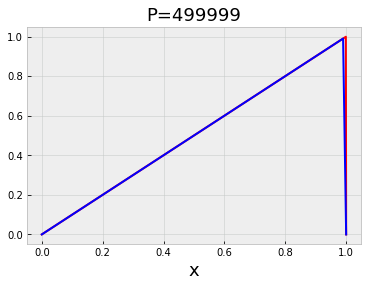

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
r=1.0                                             #Pendiente de la función
L=1                                               #Longitud de la cuerda
veces=1                                           #Intervalo a graficar
Pmax=500000                                         #Numero de terminos de la suma (Pmax-1 senos)
x=np.linspace (0.0,veces*L,1000)                  #Grilla para la serie de fourier
xsoga=np.linspace (0.0,L,100)                     #Grilla para la soga
k=np.pi/L                                         #Frecuencia espacial fundamental 
Faprox=0                                          #Inicialización del valor de la aproximación de F
F=r*xsoga                                         #Función de diente de sierra
F[99]=0                                           #Valor de Fuerza soga en xsoga=L
for p in range (1,Pmax):                          #Ciclo para la suma de terminos de la serie de fourier truncada en Pmax
  Fp=( -1)**( p+1)*(2*r*L)/(p*np.pi)
  Faprox=Faprox+Fp*np.sin(p*k*x)
plt.plot (x,Faprox,c='r')                         #Grafico F aproximada
plt.plot (xsoga,F,c='b')                          #Grafico diente de sierra
plt.title("P=%i" %(Pmax-1), fontsize=18)          #Titulo
plt.xlabel("x",fontsize=18)                       #Etiqueta eje X
plt.grid(b=True, which="major", color="xkcd:silver", linestyle="-")

### Serie de Fourier para pulso rectangular 

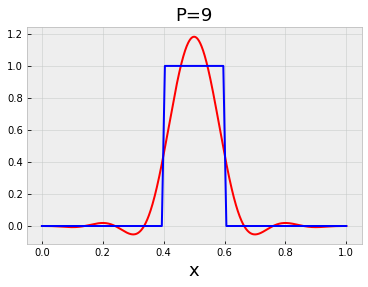

In [ ]:
# Serie de Fourier para pulso rectangular 
# altura a, centrado en x0+c/2 y ancho c 
#    F(x)=a para x0 < x < x0+c
#    F(x)=0 para x fuera del intervalo [x0,x0+c]
# Faprox(x)=F1*sin(kt)+F2*sin(2kt)+F3*sin(3kt)+F4*sin(4kt)+F5*sin(5kt)+...

import numpy as np
import matplotlib.pyplot as plt
a=1.0 		#altura pulso
x0=0.4		#empieza pulso
c=0.2		#ancho pulso
L=1 		#longitud cuerda
veces=1	#cuantas veces L voy a graficar
Pmax=10 	#voy a sumar Pmax-1 senos
x=np.linspace(0.0,veces*L,1000)		#grilla para la serie
xsoga=np.linspace(0.0,L,100)		#grilla para la soga
k=np.pi/L				#frecuencia espacial fundamental

Faprox=0				#inicializo la aproximacion de F
F=np.zeros(100)				#el pulso evaluado en xsoga
for j in range(100):
    if x0 <= xsoga[j] and xsoga[j]<= x0+c:
      F[j]=a
 					
for p in range(1,Pmax):			#ciclo de suma de la serie truncada
    Fp=2*a*(np.cos(p*k*x0)-np.cos(p*k*(x0+c)))/(p*np.pi)
    Faprox=Faprox+Fp*np.sin(p*k*x)

plt.plot(x,Faprox,c='r')		#grafico F aproximada
plt.plot(xsoga,F,c='b')			#grafico pulso
plt.title('P=%i' %(Pmax-1),fontsize=18)		#pongo un titulo
plt.xlabel('x', fontsize=18)  		#etiqueto eje x
#plt.ylabel('forma inicial', fontsize=18)  		#etiqueto eje y
plt.grid(b=True, which='major', color='xkcd:silver', linestyle='-')